# OpenScope's Illusion Dataset

Imagine being out in the open sea on a boat. Suddenly, you notice a dark shape passing by underwater. Even though the shape is distorted by the wave and the color is a mere shade different from the water, you mind automatically infers the outline of a shark. As illustrated, perception is inference rather than faithful reconstruction. However sensory neuroscience has traditionally focused on the question of how faithfully/accurately the brain can represent sensory information. Moreover, sensory stimuli typically used in neurophysiology experiments make it difficult to dissociate between a neural representation that is faithful vs inferred. Illusions arise due to rational mistakes in perceptual inference, exemplifying the dichotomy between faithful representation and inferred representation. Openscope's Illusion Experiment described by [{cite}`Shin2023`](https://www.biorxiv.org/content/10.1101/2023.06.05.543698v1), utilizes illusory contours (ICs) to study the neural mechanisms of perceptual inference.

ICs have direct neural substrates in the brain – there are neurons in the visual cortex that respond to ICs with the same specificity as to real edges (IC-encoders). Prior literature has shown IC-encoding in primary visual cortex (V1) arises through top-down feedback from higher visual areas (Figure 1). IC perception requires precise alignment of inducers (e.g., black circular shapes on either side of the illusory contour): Rotating one of the inducers no longer evokes an illusory percept (rotated control images, RCs). It follows that inducer-encoders, i.e., neurons that receive feedforward sensory information from inducers on either side of the IC, need to coordinate their sensory driven activity to drive IC-encoders in higher visual areas, and in turn, V1. In other words, IC-encoders need to bind with inducer-encoders on both sides of the IC. On the contrary, the binding of faithful neurons, i.e., neurons that respond to real edges but not to illusory contours, is inconsequential for IC perception. Therefore, ICs necessitate a much more selective group of neurons to bind compared to real edges, narrowing down the spatial component of the binding problem. Thus, ICs are ideally suited for addressing the temporal component of the binding problem.

![illusion_fig1.png](../../data/images/illusion_fig1.png)

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [1]:
import warnings
warnings.filterwarnings('ignore')

try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .
    %cd docs/projects

In [2]:
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import warnings

from math import floor, ceil, isclose
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from PIL import Image
from scipy.ndimage import gaussian_filter1d
from scipy.stats import kruskal, wilcoxon
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### The Experiment
As shown in the metadata table below, Openscope's Illusion Experiment has produced 13 different main files on the [DANDI Archive](http://dandiarchive.org) with 7 males and 5 females. There are no wildtype mice but there are Pvalb and Sst genotypes. This table was generated from [Getting Experimental Metadata from DANDI](../basics/get_dandiset_metadata.ipynb).

In [3]:
session_files = pd.read_csv("../../data/illusion_sessions.csv")
session_files

,identifier,size,path,session_time,specimen_name,sex,age,genotype,probes,stim_types,n_units,session_end
0,9ab6bfff-70ed-44dc-b384-96b4cef2b566,3308934228,sub-633229/sub-633229_ses-1199247593_ogen.nwb,2022-08-17 00:00:00-07:00,633229,F,101.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'OptogeneticStimulusDevice', 'probeD', 'probe...","{'ICkcfg1_presentations', 'ICwcfg0_presentatio...",3026,7279.58784
1,15bbb781-f912-4630-b9fe-f3df864290ad,2773818936,sub-631510/sub-631510_ses-1196157974_ogen.nwb,2022-08-03 00:00:00-07:00,631510,F,99.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'OptogeneticStimulusDevice', 'probeD', 'probe...","{'ICkcfg1_presentations', 'ICwcfg0_presentatio...",2386,7339.21131
2,f7b65765-41b5-4605-9585-95338c3a9e5a,2717870004,sub-620334/sub-620334_ses-1189887297_ogen.nwb,2022-07-06 00:00:00-07:00,620334,M,154.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'OptogeneticStimulusDevice', 'probeD', 'probe...","{'ICkcfg1_presentations', 'ICwcfg0_presentatio...",2092,7279.89479
3,6b321a1c-55c4-4de5-8a25-373f2c5a4bc8,3036007774,sub-620333/sub-620333_ses-1188137866_ogen.nwb,2022-06-30 00:00:00-07:00,620333,M,148.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'OptogeneticStimulusDevice', 'probeD', 'probe...","{'ICkcfg1_presentations', 'ICwcfg0_presentatio...",2593,7283.08716
4,0073a783-5b41-42a8-882a-2960554d4e43,2108745405,sub-631570/sub-631570_ses-1194857009_ogen.nwb,2022-07-28 00:00:00-07:00,631570,F,92.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'OptogeneticStimulusDevice', 'probeD', 'probe...","{'ICkcfg1_presentations', 'ICwcfg0_presentatio...",1789,7278.92195
5,1b7aaf88-eabd-46f5-8f2a-c1fecba823f2,2598789798,sub-625555/sub-625555_ses-1183070926_ogen.nwb,2022-06-09 00:00:00-07:00,625555,F,90.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'OptogeneticStimulusDevice', 'probeD', 'probe...","{'ICkcfg1_presentations', 'ICwcfg0_presentatio...",2621,7278.57204
6,3e3d9ce2-4d45-4f41-a957-532cbdf5bc39,3619691457,sub-625554/sub-625554_ses-1181330601_ogen.nwb,2022-06-01 00:00:00-07:00,625554,M,82.0,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'OptogeneticStimulusDevice', 'probeD', 'probe...","{'ICkcfg1_presentations', 'ICwcfg0_presentatio...",2930,7315.43515
7,f1a26076-0a3e-43c8-b138-5320bca7a23f,2469141920,sub-619296/sub-619296_ses-1187930705_ogen.nwb,2022-06-29 00:00:00-07:00,619296,M,154.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'OptogeneticStimulusDevice', 'probeD', 'probe...","{'ICkcfg1_presentations', 'ICwcfg0_presentatio...",1918,7278.13709
8,bc340647-7b72-4ec8-aa86-ac236da36713,2709636662,sub-630506/sub-630506_ses-1192952695_ogen.nwb,2022-07-20 00:00:00-07:00,630506,F,92.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'OptogeneticStimulusDevice', 'probeD', 'probe...","{'ICkcfg1_presentations', 'ICwcfg0_presentatio...",2517,7279.14674
9,efb53d2c-2d51-4a26-9b36-5d3d3ff7e19e,2803551453,sub-625545/sub-625545_ses-1182865981_ogen.nwb,2022-06-08 00:00:00-07:00,625545,M,89.0,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,"{'OptogeneticStimulusDevice', 'probeD', 'probe...","{'ICkcfg1_presentations', 'ICwcfg0_presentatio...",2793,7279.21336


In [4]:
m_count = len(session_files["sex"][session_files["sex"] == "M"])
f_count = len(session_files["sex"][session_files["sex"] == "F"])
sst_count = len(session_files[session_files["genotype"].str.count("Sst") >= 1])
pval_count = len(session_files[session_files["genotype"].str.count("Pval") >= 1])
wt_count = len(session_files[session_files["genotype"].str.count("wt/wt") >= 1])

print("Dandiset Overview:")
print(len(session_files), "files")
print(len(set(session_files["specimen_name"])), "subjects", m_count, "males,", f_count, "females")
print(sst_count, "sst,", pval_count, "pval,", wt_count, "wt")

Dandiset Overview:
12 files
12 subjects 7 males, 5 females
9 sst, 3 pval, 0 wt


### Downloading Ecephys File

In [5]:
dandiset_id = "000248"
dandi_filepath = "sub-620333/sub-620333_ses-1188137866_ogen.nwb"
download_loc = "."

In [6]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc)
nwb = io.read()

A newer version (0.62.2) of dandi/dandi-cli is available. You are using 0.61.2


File already exists
Opening file


### Showing Stim Templates
The experiment consists of 118 unique stimulus frames which are shown throughout the duration in various phases. The groups below display the different sets of templates. There are four sets of Illusory Contour (IC) templates, that are either black or white, and are either arranged at 0 or 45 degrees on the screen. It can be seen that there are some images that show real contours and some that show illusory contours, as well as images whose IC encoders are orthogonal, showing no illusory contour. Additionally, there are Receptive Field and Size Templates which will be used identify neurons active in the relevant fields of the stim.

In [7]:
print(nwb.stimulus_template.keys())

dict_keys(['ICkcfg0_presentations', 'ICkcfg1_presentations', 'ICwcfg0_presentations', 'ICwcfg1_presentations', 'RFCI_presentations', 'sizeCI_presentations'])


In [8]:
def show_images(images, n_cols=10):
    n_rows = (len(images) // n_cols) + 1
    fig, axes = plt.subplots(n_rows, n_cols)
    fig.set_size_inches(2*n_cols, 2*n_rows) # can tweak these if sizing/spacing needs improvement

    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 0.5

    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for i, template_name in enumerate(images):
        img = images[template_name]
        
        ax_row = int(i / n_cols)
        ax_col = i % n_cols
        axes[ax_row][ax_col].imshow(img, cmap="gray")
        axes[ax_row][ax_col].set_title(template_name, fontsize=8)

    remainder = (n_cols * n_rows) % len(images)
    remaining_axes = axes[-1][-remainder:]
    for ax in remaining_axes:
        ax.axis("off")

    for ax in axes.flat:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

    fig.tight_layout()

118 templates


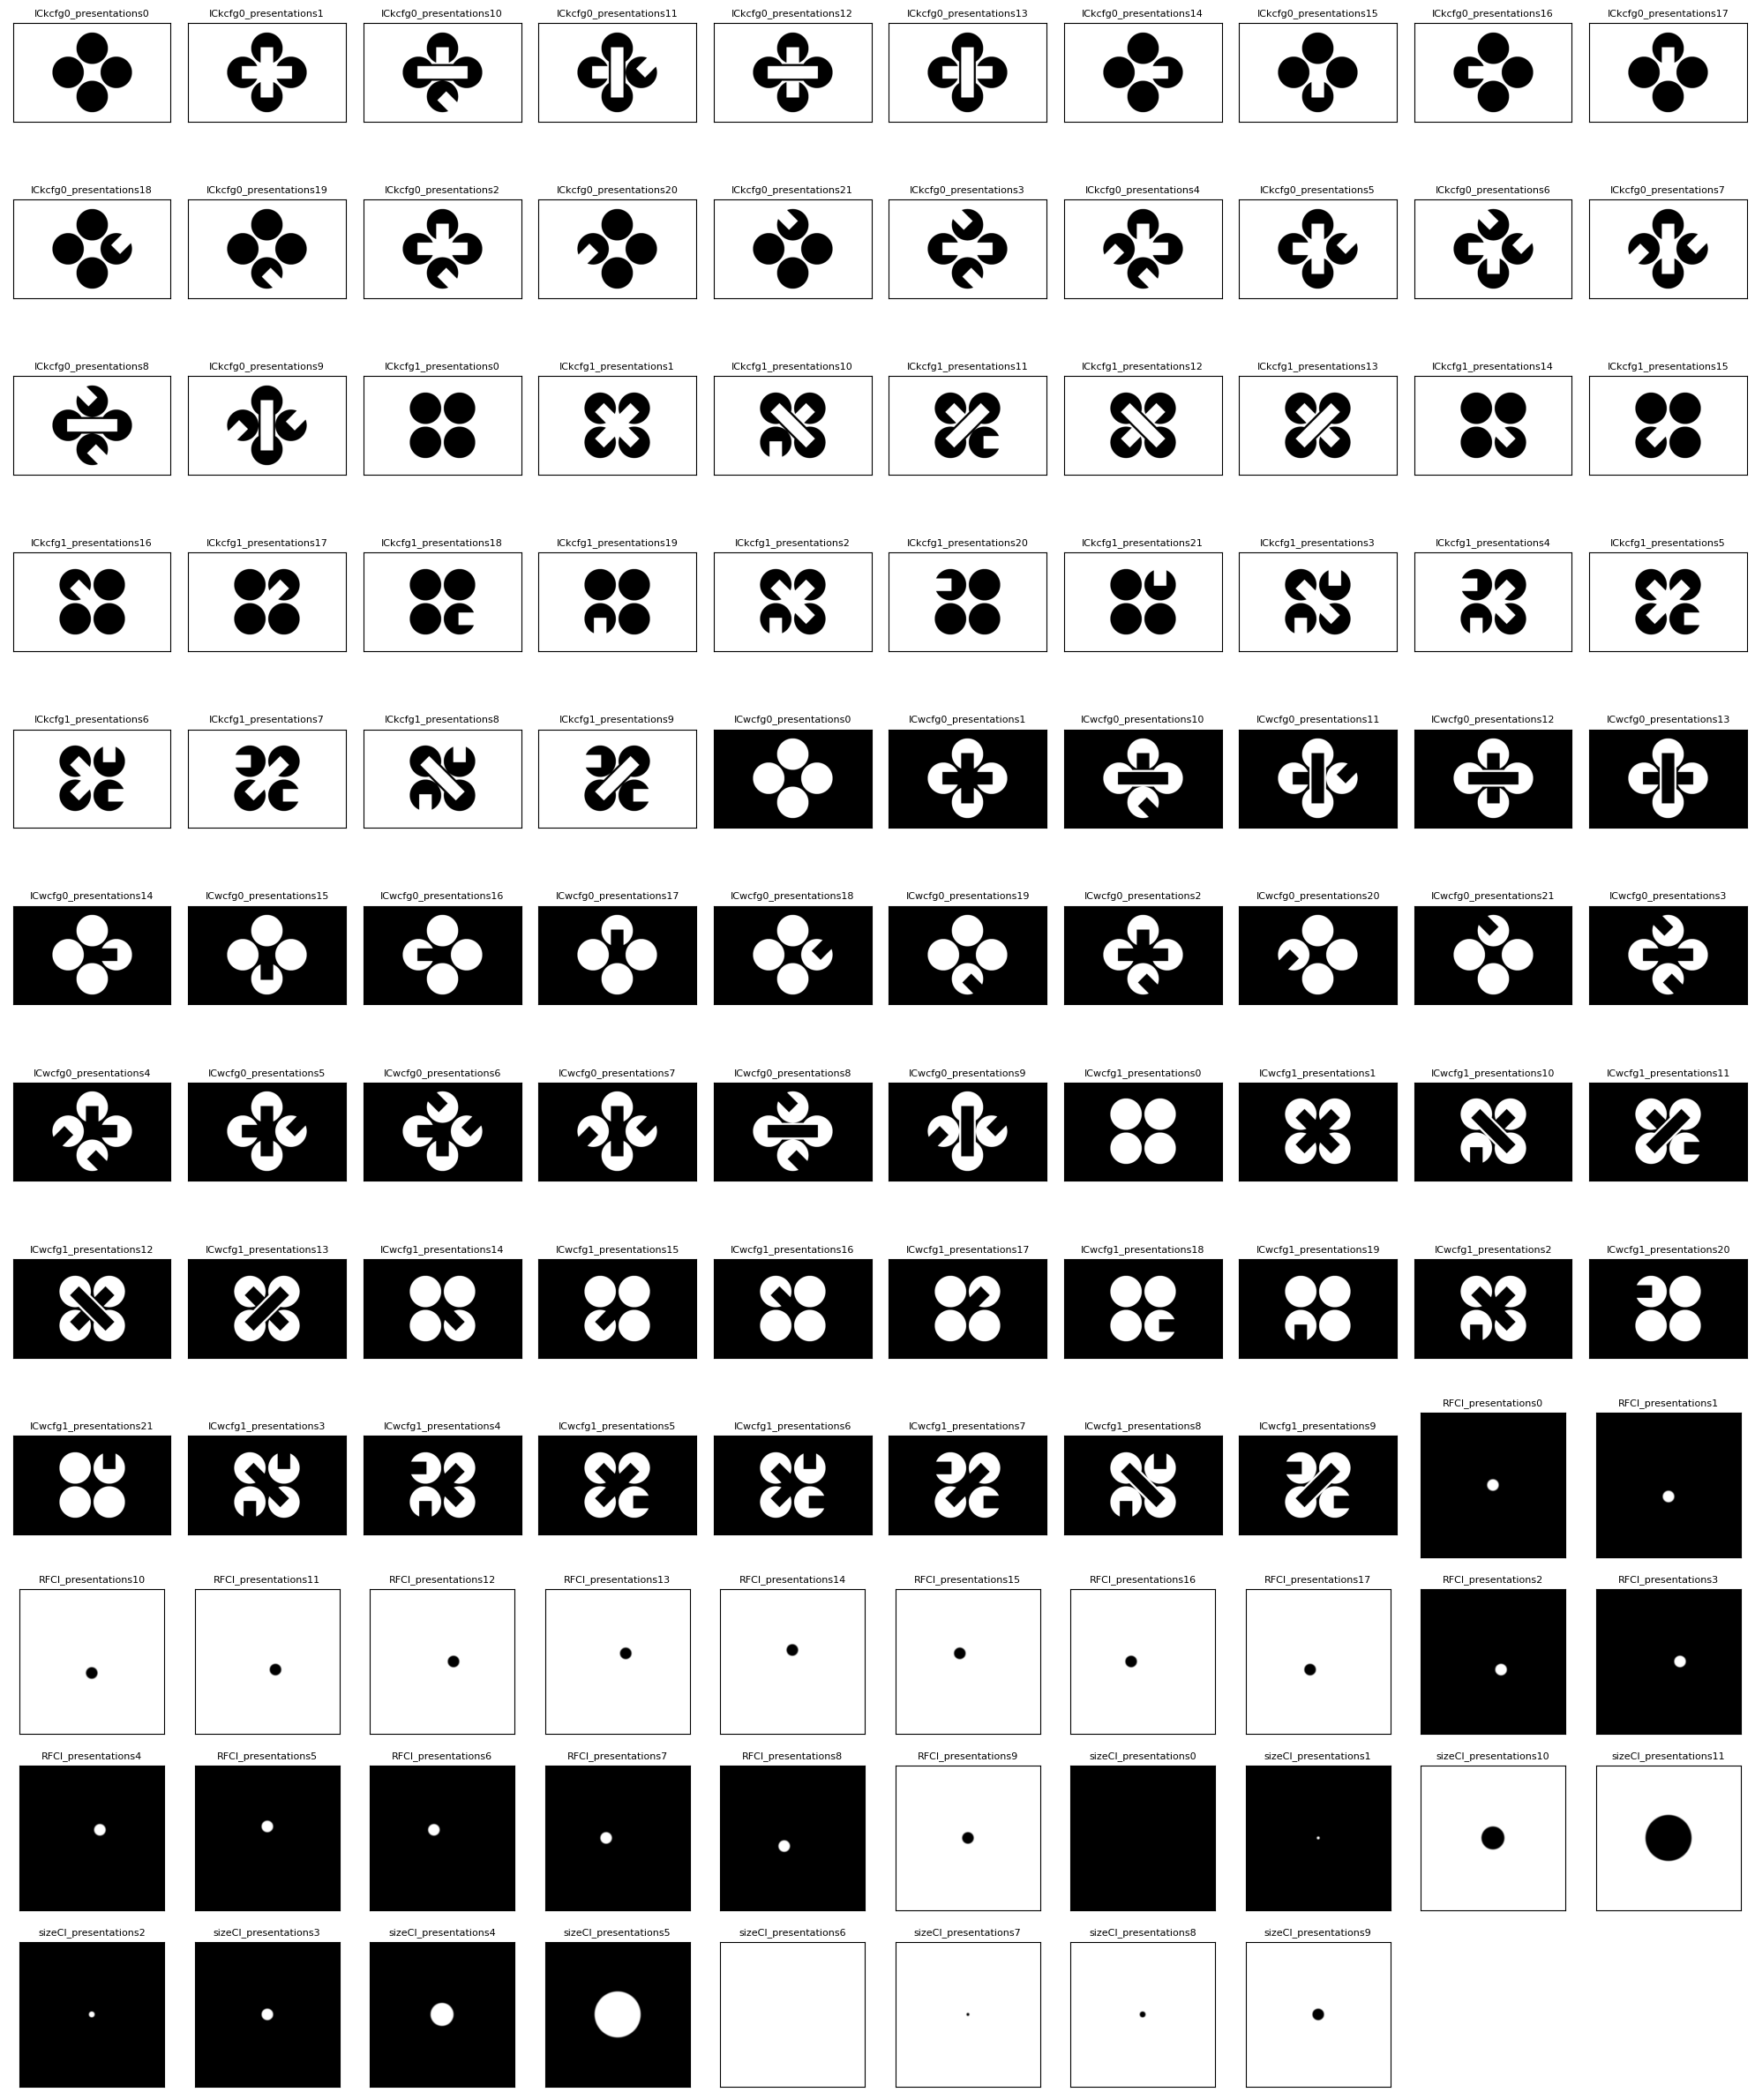

In [9]:
all_template_imgs = {}
for template_group in nwb.stimulus_template.keys():
    all_template_imgs |= nwb.stimulus_template[template_group].images

print(len(all_template_imgs), "templates")
show_images(all_template_imgs)

### Showing Probe Tracks
The images below were rendered using the [Visualizing Neuropixels Probe Locations](../visualization/visualize_neuropixels_probes.ipynb) notebook. The probes are using the [Common Coordinate Framework](https://community.brain-map.org/t/allen-mouse-ccf-accessing-and-using-related-data-and-tools/359) (CCF). The experiment uses six probes labeled A-F to target various regions. It can be seen that the probe tracks look bent. This is due to the fact that each mouse brain varies slightly, so the coordinate space is slightly warped when mapping the CCF coordinates to each mouse's brain.

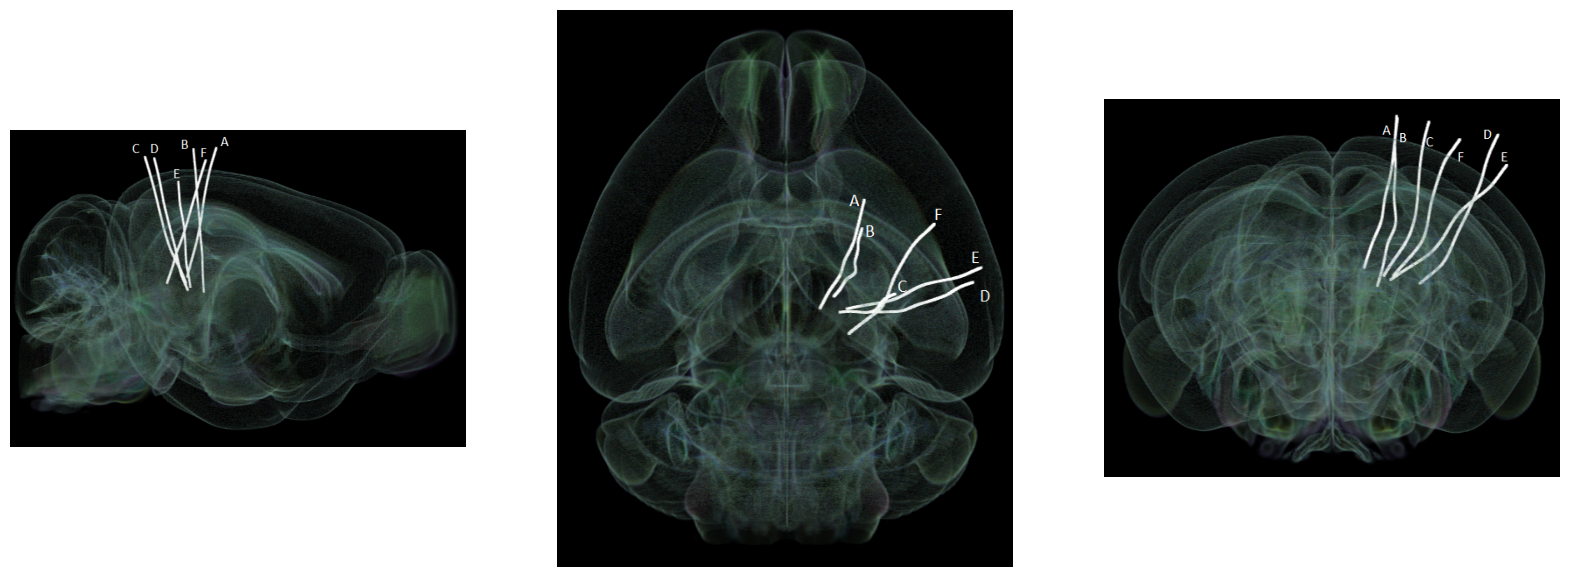

In [10]:
sagittal_view = Image.open("../../data/images/probes_sagittal.png")
dorsal_view = Image.open("../../data/images/probes_dorsal.png")
transverse_view = Image.open("../../data/images/probes_transverse.png")
fig, axes = plt.subplots(1,3,figsize=(20,60))

axes[0].imshow(sagittal_view)
axes[1].imshow(dorsal_view)
axes[2].imshow(transverse_view)
for ax in axes:
    ax.axis("off")

### Extracting Units Spikes
Below, the `Units` table is retrieved from the file. It contains many metrics for every putative neuronal unit, printed below. For the analysis in this notebook, we are only interested in the `spike_times` attribute. This is an array of timestamps that a spike is measured for each unit. For more information on the various unit metrics, see [Visualizing Unit Quality Metrics](../visualization/visualize_unit_metrics.ipynb). From this table, the Units used in this notebook are selected if they have 'good' quality rather than 'noise', and if they belong in one of the regions of the primary visual cortex.

In [11]:
units = nwb.units
units[:10]

,quality,nn_hit_rate,max_drift,firing_rate,nn_miss_rate,cumulative_drift,amplitude,silhouette_score,peak_channel_id,recovery_slope,...,isolation_distance,snr,velocity_above,isi_violations,velocity_below,repolarization_slope,cluster_id,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
18,good,0.972840,54.39,0.785629,0.000101,304.75,409.946355,-1.000000,1,-0.080977,...,58.451532,4.150814,-0.686767,1.487302,-1.000000,1.240973,0,"[4.619753663168268, 9.457581949708135, 13.1722...","[0.00025338330763588783, 0.0004250468749792737...","[[0.0, 0.742949999999996, 2.6014949999999954, ..."
19,good,0.985333,24.95,15.449669,0.003207,465.01,220.825800,0.315177,4,-0.295615,...,85.345951,2.300934,-0.206030,0.070768,0.000000,0.870400,1,"[4.599820350629247, 4.6193869968841055, 4.6958...","[0.00017759864579981443, 0.0001952821079373443...","[[0.0, 0.3352050000000011, 0.656565000000001, ..."
20,good,0.990667,30.85,4.441959,0.001217,514.47,221.874120,0.147414,2,-0.095838,...,79.468326,2.524524,0.618090,0.128934,-1.000000,0.752556,2,"[4.619453663481226, 4.6196536632725875, 13.132...","[0.0004071066388380147, 0.0004011982449094236,...","[[0.0, -1.3414050000000004, -0.667094999999999..."
21,good,0.905149,46.79,4.488801,0.003357,469.56,249.373410,0.079532,4,-0.227309,...,50.526803,2.558366,0.206030,0.171801,0.686767,1.079105,3,"[4.61718699917913, 4.6436869715345175, 4.65532...","[0.0003194871684192031, 0.0002639795077521114,...","[[0.0, -0.07585499999999135, -0.81860999999999..."
22,good,0.993333,30.62,24.789545,0.001714,210.26,377.191620,0.067281,4,-0.409635,...,109.089797,3.961270,-0.343384,0.000746,0.000000,1.664511,4,"[4.683020263835597, 4.689420257159162, 4.69892...","[0.0004522358091835468, 0.0004033241545627162,...","[[0.0, 0.7710299999999997, 2.760810000000002, ..."
23,good,0.887821,31.42,1.916063,0.001044,118.23,221.932815,0.083996,6,-0.232742,...,50.598302,1.696094,0.000000,0.340775,0.000000,0.780761,5,"[4.618953664002823, 4.619286996988425, 4.61948...","[0.0005486640019763263, 0.00020423305698845652...","[[0.0, -0.4504500000000009, -0.460785000000004..."
24,good,0.766667,47.33,0.319214,0.000501,277.97,236.829255,0.260263,5,-0.334351,...,35.118253,1.700857,-0.068677,20.095854,0.000000,1.031677,6,"[4.619886996362509, 7.269484232318557, 7.37791...","[0.00034363439042978165, 0.0004037014396835840...","[[0.0, -0.1534650000000184, -3.154515000000026..."
25,good,0.037037,34.82,0.169565,0.000434,160.86,296.549955,-0.038703,6,-0.364719,...,27.533061,2.390386,0.137353,5.801667,0.000000,1.316846,7,"[2413.647573913121, 2464.689920666051, 3131.98...","[0.0003001921893995495, 0.00030728132092582244...","[[0.0, -0.6731399999999987, -0.014234999999998..."
26,good,0.958865,54.69,12.707811,0.003463,427.25,529.920495,0.079900,6,-0.251467,...,78.752644,1.623686,0.068677,0.042095,-1.000000,0.788288,8,"[4.623886992189737, 4.652320295861619, 4.65715...","[0.0005655237299818749, 0.00048325383310849506...","[[0.0, -0.5851949999999991, -1.558634999999999..."


In [12]:
### use the electrodes table to devise a function which maps units to their brain regions

# select electrodes
channel_probes = {}

electrodes = nwb.electrodes
for i in range(len(electrodes)):
    channel_id = electrodes["id"][i]
    location = electrodes["location"][i]
    channel_probes[channel_id] = location

# function aligns location information from electrodes table with channel id from the units table
def get_unit_location(row):
    return channel_probes[int(row.peak_channel_id)]

print(set(get_unit_location(row) for row in units))

{'POL', 'VISl2/3', 'VISpm2/3', 'DG-sg', 'VISrl6a', 'VISam2/3', 'VISal6a', 'VISpm4', 'VISp6b', 'VISp4', 'MGm', 'VISam5', 'VISal2/3', 'VISp5', 'VISal6b', 'DG-mo', 'VISpm1', 'MGv', 'DG-po', 'LP', 'PoT', 'MGd', 'VISal4', 'VISp2/3', 'VISam1', 'VISpm5', 'root', 'SGN', 'VISal5', 'VISam4', 'SUB', 'CA3', 'VISrl2/3', 'VISl6a', 'CA1', 'VISrl5', 'ProS', 'VISrl4', 'APN', 'VISpm6b', 'VISpm6a', 'VISp6a', 'VISl5', 'VISl4', 'VISam6a', 'MB'}


In [13]:
### selecting units spike times

brain_regions = ["VISp6a", "VISp5", "VISp4", "VISp6b", "VISp2/3"]

# select units based if they have 'good' quality and exists in one of the specified brain_regions
units_spike_times = []
for location in brain_regions:
    location_units_spike_times = []
    for row in units:
        if get_unit_location(row) == location and row.quality.item() == "good":
            location_units_spike_times.append(row.spike_times.item())
    units_spike_times += location_units_spike_times

print(len(units_spike_times))

114


### Session Timeline
To get a good idea of the order and the way stimulus is shown throughout the session, the code below generates a timeline of the various 'epochs' of stimulus. It can be seen that each of the four IC image sets are shown, followed by receptive field and size templates. The final epoch is optogenetic stimulation, which is not visual stimulus but optogenetic laser stimulus. More on this in the *Optotagging* section later.

In [14]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [15]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# manually add optotagging epoch since the table is stored separately
opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
opto_epoch = ("optogenetic_stimulation", 1.0, opto_stim_table.start_time[0], opto_stim_table.stop_time[-1])
epochs.append(opto_epoch)

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

7
('ICwcfg1_presentations', 0.0, 66.27082, 4357.8786)
('ICwcfg0_presentations', 1.0, 4670.14116, 5222.60555)
('ICkcfg1_presentations', 2.0, 5230.6123, 5783.0766)
('ICkcfg0_presentations', 3.0, 5791.08332, 6343.54758)
('RFCI_presentations', 4.0, 6351.60441, 6531.80575)
('sizeCI_presentations', 5.0, 6561.86442, 7283.08716)
('optogenetic_stimulation', 1.0, 7318.96099, 8931.55232)


In [16]:
time_start = floor(min([epoch[2] for epoch in epochs]))
time_end = ceil(max([epoch[3] for epoch in epochs]))
all_units_spike_times = np.concatenate(units_spike_times).ravel()
print(time_start, time_end)

# make histogram of unit spikes per second over specified timeframe
time_bin_edges = np.linspace(time_start, time_end, (time_end-time_start))
hist, bins = np.histogram(all_units_spike_times, bins=time_bin_edges)

66 8932


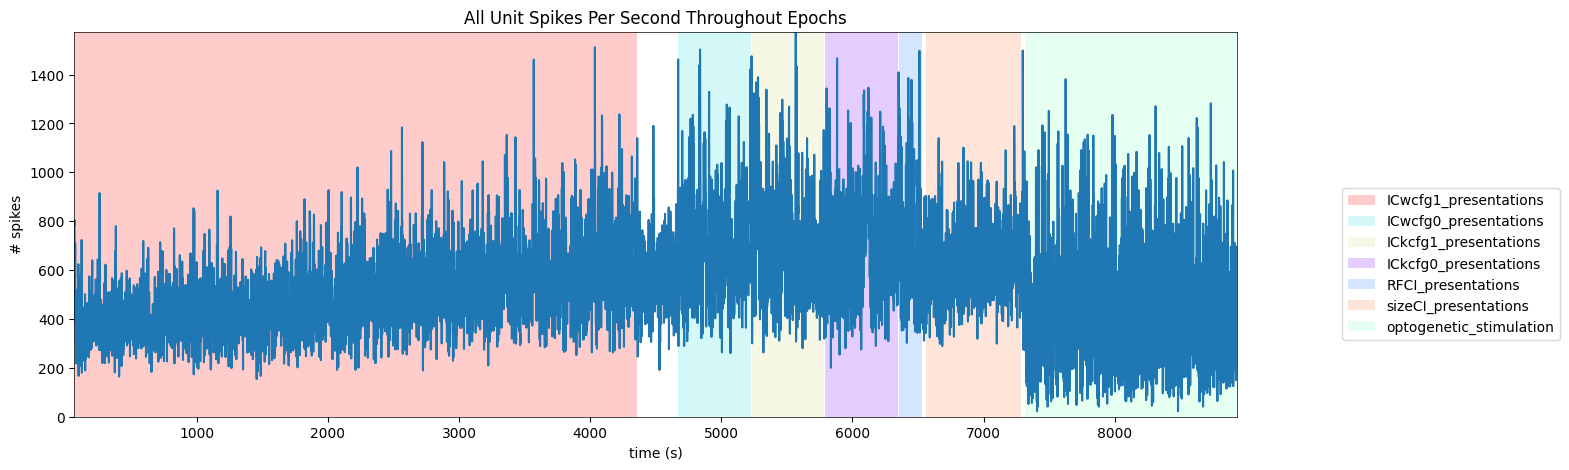

In [17]:
# generate plot of spike histogram with colored epoch intervals and legend
fig, ax = plt.subplots(figsize=(15,5))

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
height = max(hist)
# draw colored rectangles for each epoch
for epoch in epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, 0), epoch_end-epoch_start, height, alpha=0.2, facecolor=color))
    epoch_key[stim_name] = rec
    
ax.set_xlim(time_start, time_end)
ax.set_ylim(-0.1, height+0.1)
ax.set_xlabel("time (s)")
ax.set_ylabel("# spikes")
ax.set_title("All Unit Spikes Per Second Throughout Epochs")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.12, 0.25))
ax.plot(bins[:-1], hist)

### Extracting Stimulus Times
For this notebook, the first set of Illusory Contour stimulus, `ICkcfg0_presentations` is chosen. Shown below is this set's stimulus table. In order to compare neuronal responses during a frame with an illusory contour and a frame without, the stimulus times following frame 10 and frame 5 are chosen.

In [18]:
nwb.intervals.keys()

dict_keys(['ICkcfg0_presentations', 'ICkcfg1_presentations', 'ICwcfg0_presentations', 'ICwcfg1_presentations', 'RFCI_presentations', 'invalid_times', 'sizeCI_presentations', 'spontaneous_presentations'])

In [19]:
stim_table = nwb.intervals["ICkcfg0_presentations"]
print(stim_table.colnames)
stim_table[:10]

('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'stimulus_index', 'tags', 'timeseries')


,start_time,stop_time,stimulus_name,stimulus_block,frame,stimulus_index,tags,timeseries
id,,,,,,,,
0,5791.08332,5791.48365,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13484, 1, timestamps pynwb.base.TimeSeries a..."
1,5791.48365,5791.88399,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13485, 1, timestamps pynwb.base.TimeSeries a..."
2,5791.88399,5792.28432,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13486, 1, timestamps pynwb.base.TimeSeries a..."
3,5792.28432,5792.68466,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13487, 1, timestamps pynwb.base.TimeSeries a..."
4,5792.68466,5793.08500,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13488, 1, timestamps pynwb.base.TimeSeries a..."
5,5793.08500,5793.48536,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13489, 1, timestamps pynwb.base.TimeSeries a..."
6,5793.48536,5793.88565,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13490, 1, timestamps pynwb.base.TimeSeries a..."
7,5793.88565,5794.28601,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13491, 1, timestamps pynwb.base.TimeSeries a..."
8,5794.28601,5794.68631,ICkcfg0,3.0,0.0,3.0,[stimulus_time_interval],"[(13492, 1, timestamps pynwb.base.TimeSeries a..."


In [20]:
print(set(stim_table.frame))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0}


In [21]:
illusion_stim_select = lambda row: row.frame.item() == 1.0
illusion_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if illusion_stim_select(stim_table[i])]
print(len(illusion_stim_times))

control_stim_select = lambda row: row.frame.item() == 0.0
control_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if control_stim_select(stim_table[i])]
print(len(control_stim_times))

30
750


### Generating Spike Matrix
To analyze the responses to the stimuli chosen, a 3D spike matrix is generated for each array of stimulus times. The matrix has shape `n_units` * `n_trials` * `n_bins`, where `n_bins` is the number of time bins used to count spikes. The parameters `time_resolution`, `window_start_time`, and `window_end_time` below can be adjusted to alter the duration and the bin_size of the resulting matrix.

In [22]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [23]:
def get_spike_matrix(stim_times, units_spike_times, bin_edges):
    time_resolution = np.mean(np.diff(bin_edges))
    # 3D spike matrix to be populated with spike counts
    spike_matrix = np.zeros((len(units_spike_times), len(stim_times), len(bin_edges)-1))

    # populate 3D spike matrix for each unit for each stimulus trial by counting spikes into bins
    for unit_idx in range(len(units_spike_times)):
        spike_times = units_spike_times[unit_idx]

        for stim_idx, stim_time in enumerate(stim_times):
            # get spike times that fall within the bin's time range relative to the stim time        
            first_bin_time = stim_time + bin_edges[0]
            last_bin_time = stim_time + bin_edges[-1]
            first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [first_bin_time, last_bin_time])
            spike_times_in_range = spike_times[first_spike_in_range:last_spike_in_range]

            # convert spike times into relative time bin indices
            bin_indices = ((spike_times_in_range - (first_bin_time)) / time_resolution).astype(int)
            
            # mark that there is a spike at these bin times for this unit on this stim trial
            for bin_idx in bin_indices:
                spike_matrix[unit_idx, stim_idx, bin_idx] += 1

    return spike_matrix

In [24]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

illusion_spike_matrix = get_spike_matrix(illusion_stim_times, units_spike_times, bin_edges)
control_spike_matrix = get_spike_matrix(control_stim_times, units_spike_times, bin_edges)

print(illusion_spike_matrix.shape)
print(control_spike_matrix.shape)

(114, 30, 149)
(114, 750, 149)


### Showing Response Windows
After generating spike matrices, we can view the PSTHs for each unit.

In [25]:
def show_response(ax, window, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(window) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(window, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(window)], interpolation="none", vmin=vmin, vmax=vmax)
    if cbar:
        ax.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(window)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [26]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=2):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 3*rows), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=2/cols, label=cbar_label)


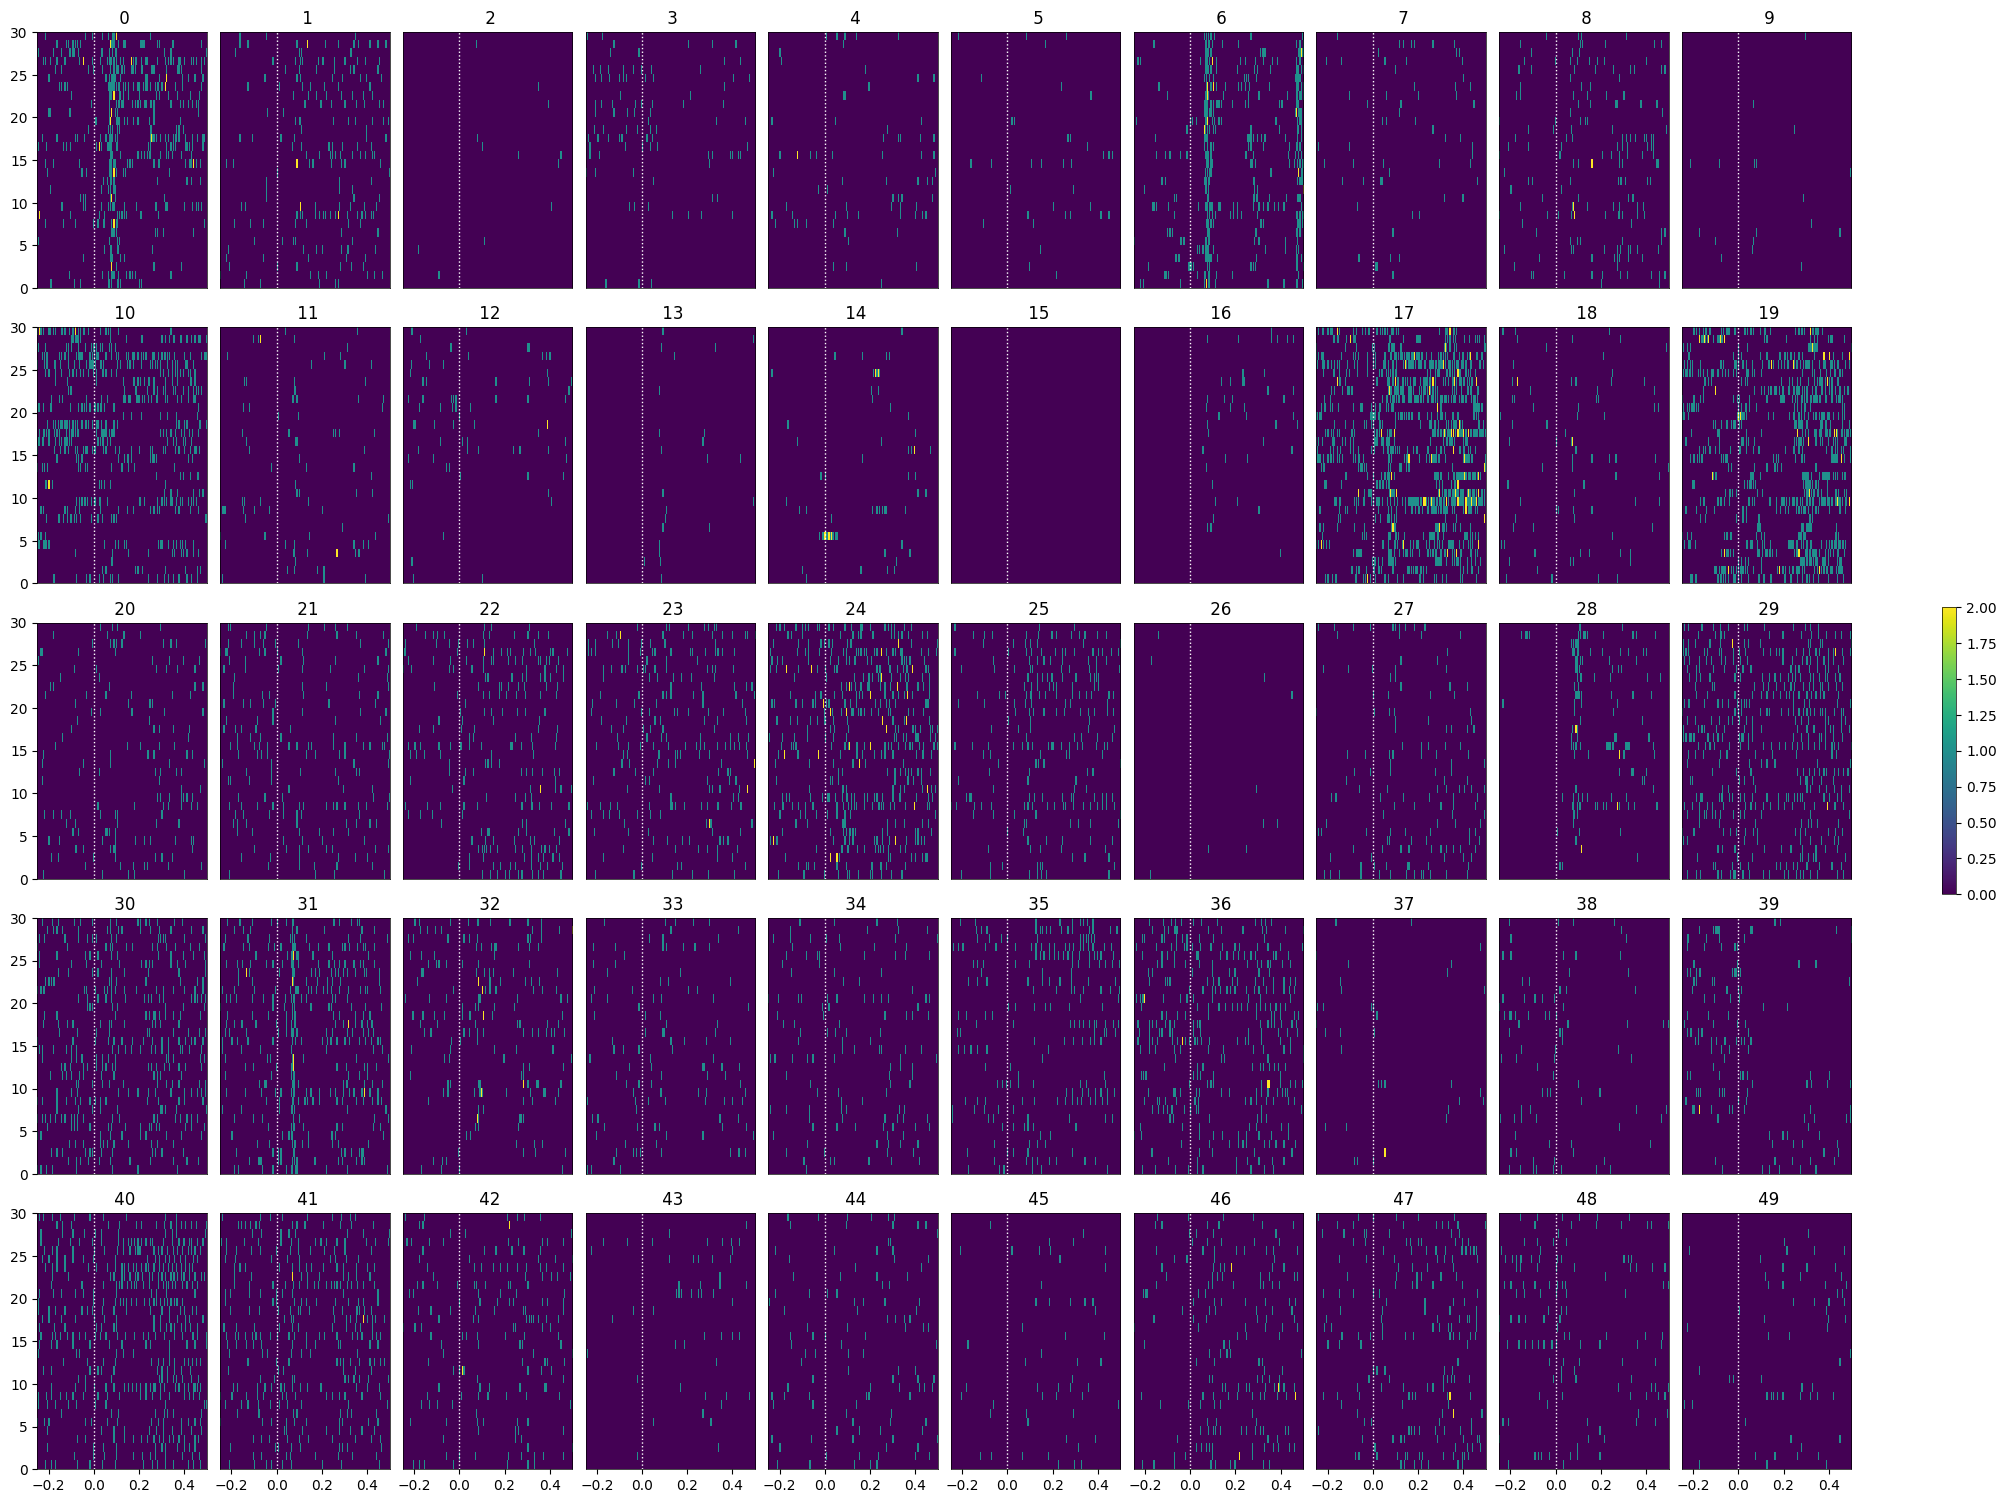

In [27]:
show_many_responses(illusion_spike_matrix, 5, 10)

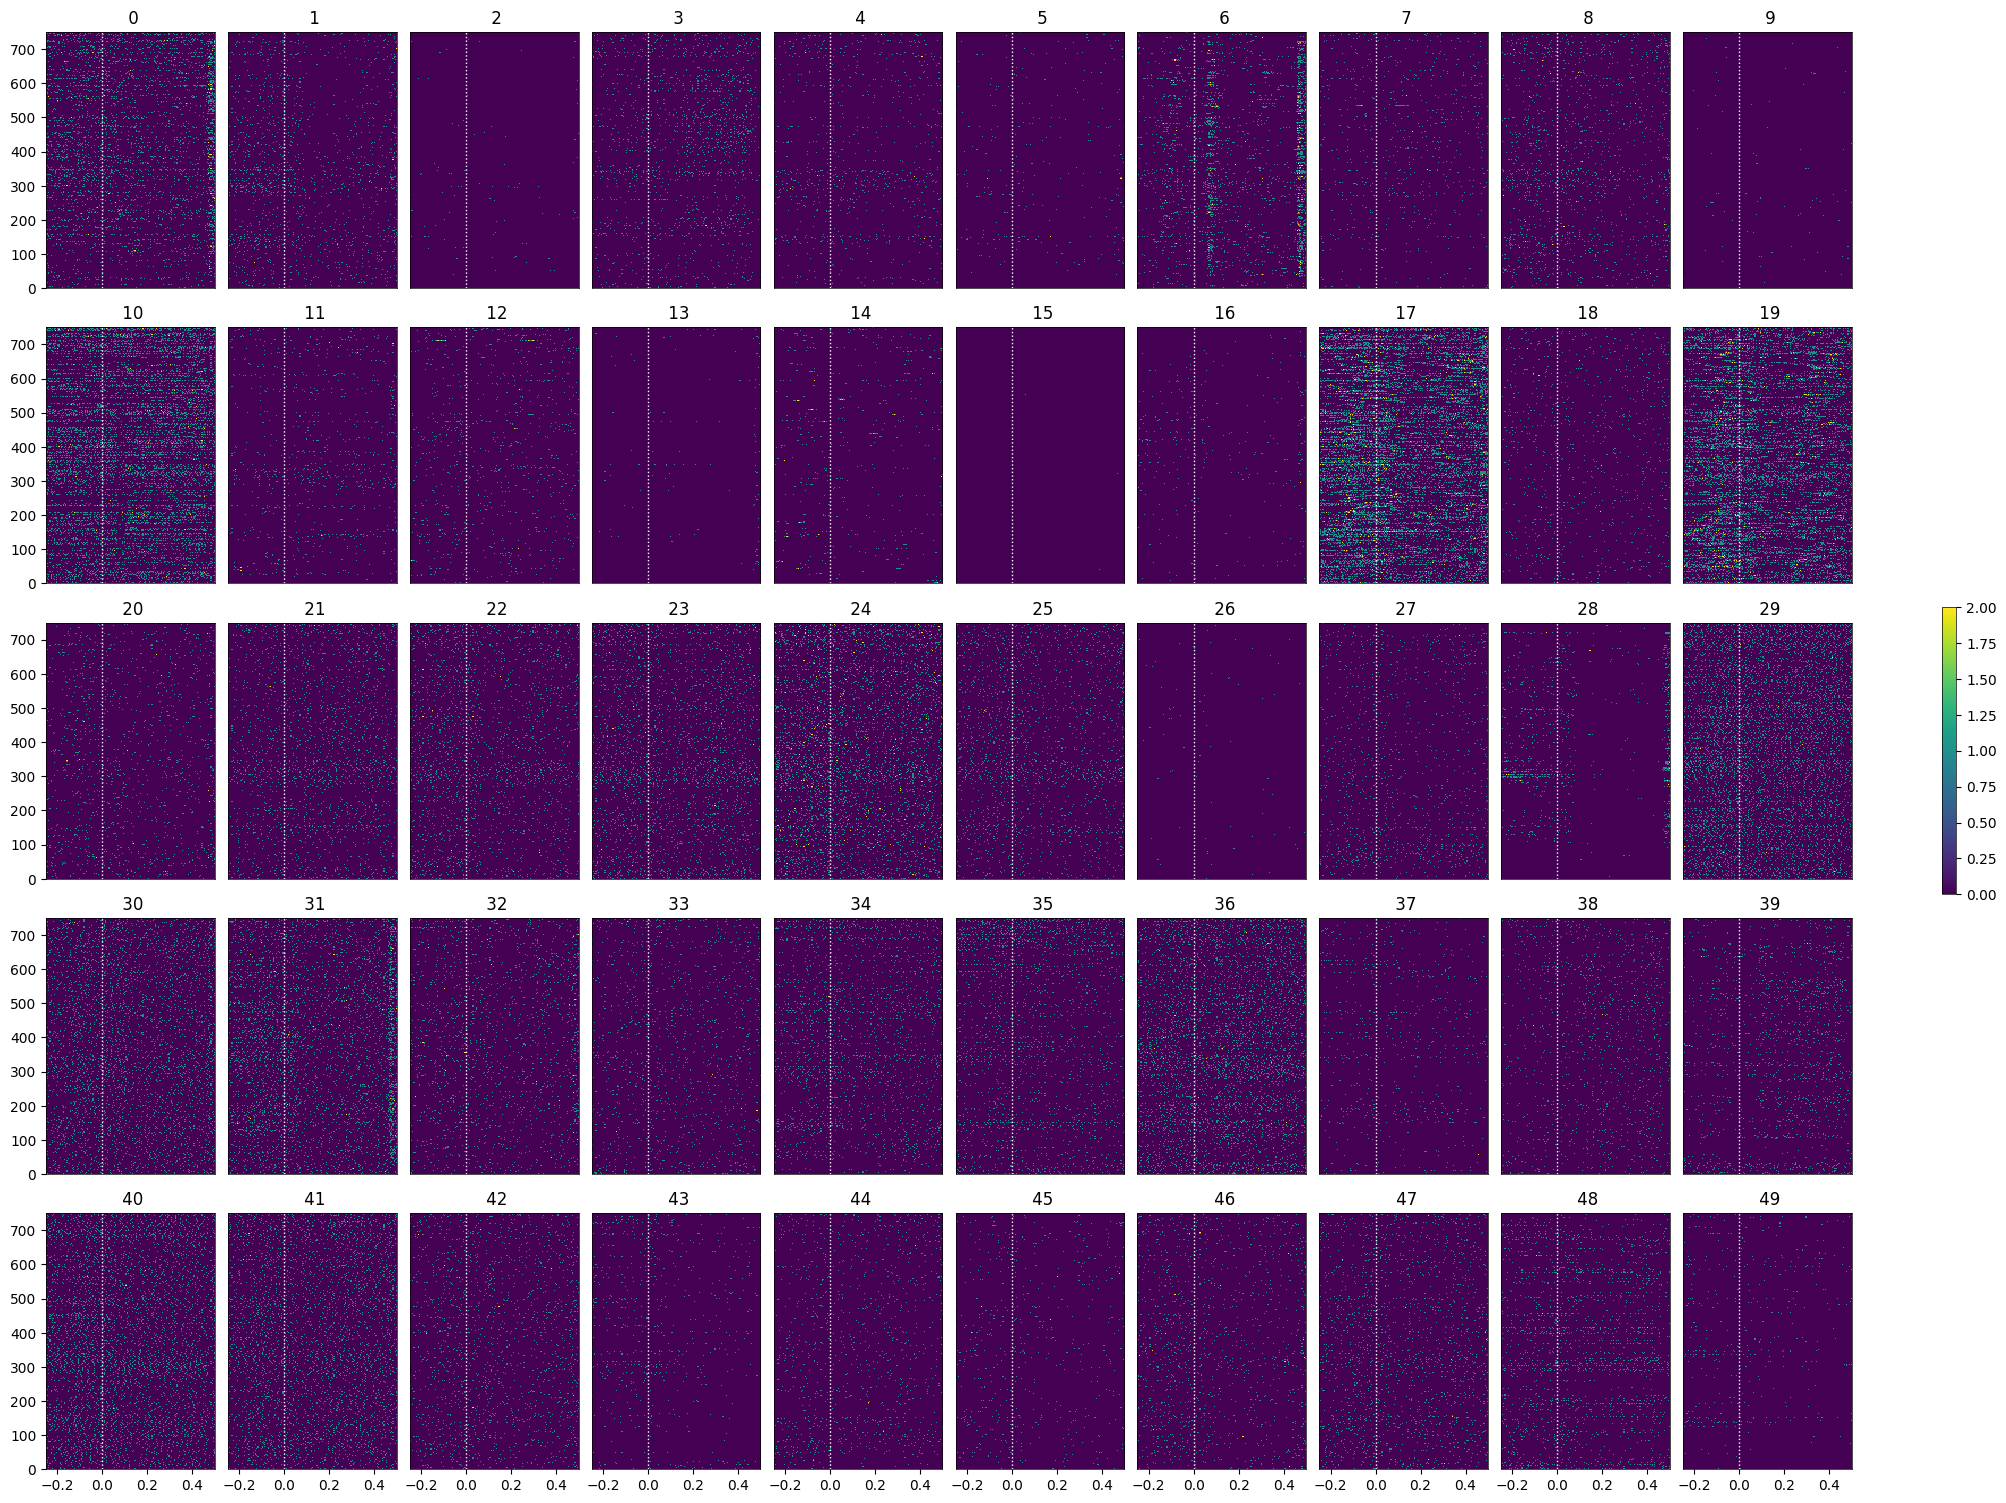

In [28]:
show_many_responses(control_spike_matrix, 5, 10)

### Selecting Responsive Cells
As discussed in [Statistically Testing 2P Responses to Stimulus](../first-order/test_2p_responses.ipynb), the criteria used to select for responsive cells can have a significant impact. Here, the simple criterion is to select units whose post-stimulus z-scores are greater than 1 or less than -1.

In [29]:
def select_cells(spike_matrix, stimulus_onset_idx):
    baseline_means = np.mean(spike_matrix[:,:,:stimulus_onset_idx], axis=2)
    mean_baseline_means = np.mean(baseline_means, axis=1)
    std_baseline_means = np.std(baseline_means, axis=1)

    response_means = np.mean(spike_matrix[:,:,stimulus_onset_idx:], axis=2)
    mean_response_means = np.mean(response_means, axis=1)

    unit_z_scores = (mean_response_means - mean_baseline_means) / std_baseline_means
    return np.where(np.logical_or(unit_z_scores > 1, unit_z_scores < -1))[0]

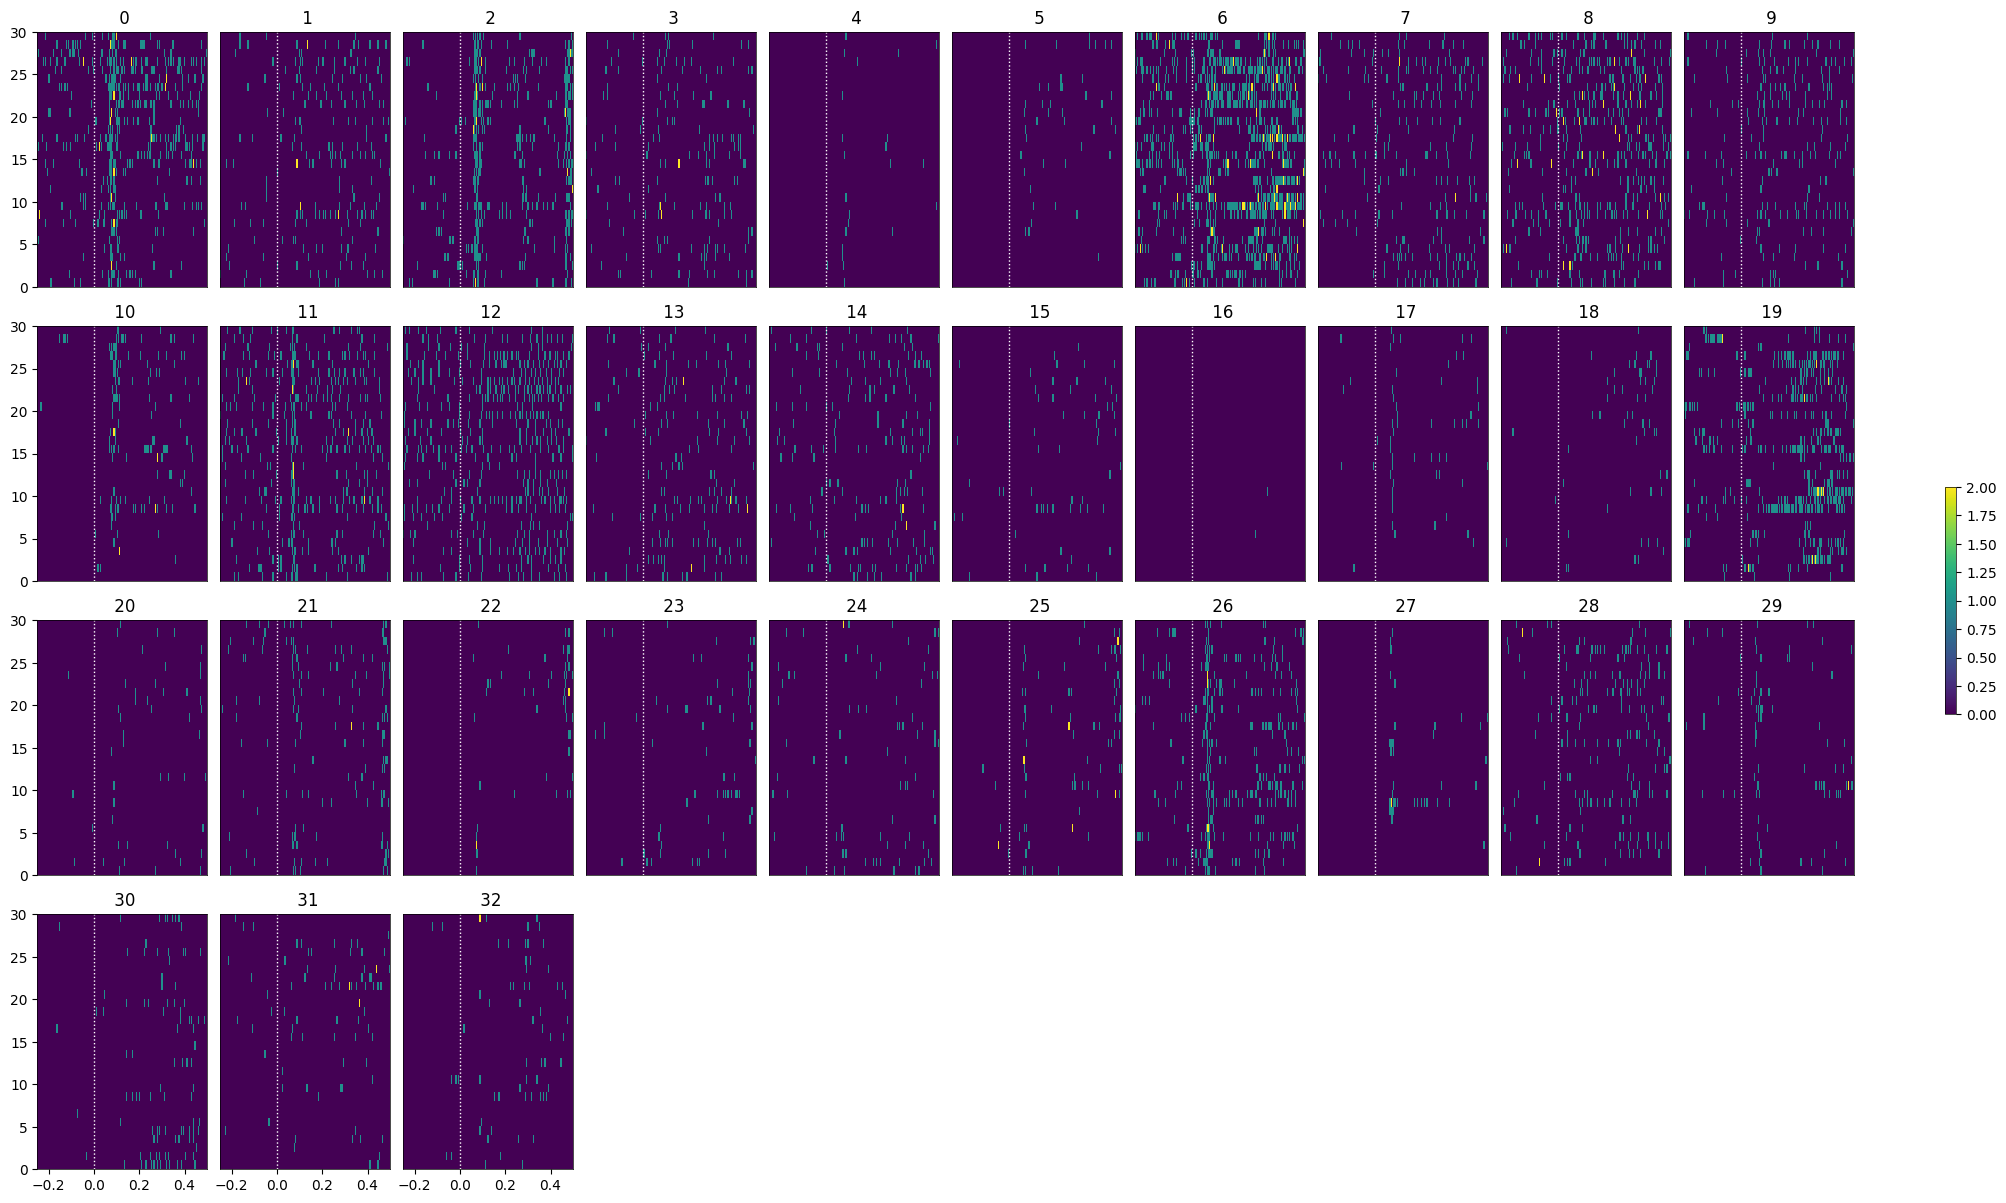

In [30]:
illusion_selected_idxs = select_cells(illusion_spike_matrix, stimulus_onset_idx)
show_many_responses(illusion_spike_matrix[illusion_selected_idxs], 5, 10)

In [31]:
control_selected_idxs = select_cells(control_spike_matrix, stimulus_onset_idx)
show_many_responses(control_spike_matrix[control_selected_idxs], 5, 10)

Input data has length 0; Nothing to display


### Getting Receptive Fields
Because the experiment includes the receptive field, stimulus, can use responses to generate receptive field images for each cell. Below, this is done for each selected cell from the illusion stimulus set and the control stimulus set. After obtaining the list of coordinates that each RF stim occupies, it's shown on one of the templates below for clarity. After this, the receptive fields are generated using its spike times and the stim times for each coordinate.

In [32]:
rf_stim_table = nwb.intervals["RFCI_presentations"].to_dataframe()
rf_stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,stimulus_index,temporal_frequency,Mask,orientation,x_position,y_position,color,contrast,opacity,phase,spatial_frequency,size,units,tags,timeseries
id,,,,,,,,,,,,,,,,,,,
0,6351.60441,6351.85456,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14865, 1, timestamps pynwb.base.TimeSeries a..."
1,6351.85456,6352.10475,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,45.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14866, 1, timestamps pynwb.base.TimeSeries a..."
2,6352.10475,6352.35496,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,90.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14867, 1, timestamps pynwb.base.TimeSeries a..."
3,6352.35496,6352.60520,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,135.0,-143.810387,143.810387,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14868, 1, timestamps pynwb.base.TimeSeries a..."
4,6352.60520,6352.85541,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,0.000000,203.378600,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14869, 1, timestamps pynwb.base.TimeSeries a..."
5,6352.85541,6353.10562,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,45.0,0.000000,203.378600,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14870, 1, timestamps pynwb.base.TimeSeries a..."
6,6353.10562,6353.35584,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,90.0,0.000000,203.378600,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14871, 1, timestamps pynwb.base.TimeSeries a..."
7,6353.35584,6353.62276,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,135.0,0.000000,203.378600,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14872, 1, timestamps pynwb.base.TimeSeries a..."
8,6353.62276,6353.87291,RFCI,4.0,4.0,2.0,//allen/programs/mindscope/workgroups/openscop...,0.0,0.000000,203.378600,"[1.0, 1.0, 1.0]",1.0,1.0,"[12919.96666667, 12919.96666667]","[0.00314683, 0.00314683]","[2560.0, 2560.0]",pix,[stimulus_time_interval],"[(14873, 1, timestamps pynwb.base.TimeSeries a..."


Text(0.5, 1.0, 'Location of receptive field gratings on Screen')

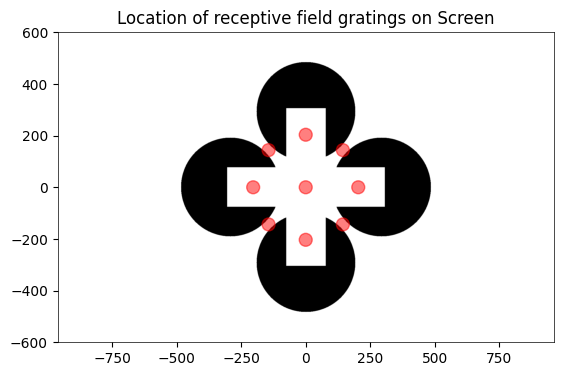

In [33]:
template = nwb.stimulus_template["ICkcfg0_presentations"].images["ICkcfg0_presentations1"]

fig, ax = plt.subplots()
img = ax.imshow(template, cmap="gray", extent=[-template.shape[1]/2., template.shape[1]/2., -template.shape[0]/2., template.shape[0]/2. ])

xcoords, ycoords = rf_stim_table.x_position, rf_stim_table.y_position
xy_pairs = set(zip(xcoords, ycoords))
for x,y in xy_pairs:
    ax.add_patch(mpl.patches.Circle((x, y), radius=25, color="red", alpha=0.5))

ax.set_title("Location of receptive field gratings on Screen")

In [34]:
### get x and y coordinates of gabors displayed to build receptive field

xs = np.sort(list(set(rf_stim_table.x_position)))
ys = np.sort(list(set(rf_stim_table.y_position)))
field_units = rf_stim_table.units[0]
print(xs)
print(ys)
print(field_units)

[-203.3786     -143.81038721    0.          143.81038721  203.3786    ]
[-203.3786     -143.81038721    0.          143.81038721  203.3786    ]
pix


In [35]:
### get receptive field of a unit using its spike times and the stim table

def get_rf(spike_times):
    # creates 2D array that stores response spike counts for each coordinate of the receptive field
    unit_rf = np.zeros([ys.size, xs.size])
    # for every x and y coordinate in the field
    for xi, x in enumerate(xs):
        for yi, y in enumerate(ys):
            
            # for this coordinate of the rf, count all the times that this neuron responds to a stimulus time with a spike
            stim_times = rf_stim_table[(rf_stim_table.x_position == x) & (rf_stim_table.y_position == y)].start_time
            response_spike_count = 0
            for stim_time in stim_times:
                # any spike within 0.2 seconds after stim time is considered a response
                start_idx, end_idx = np.searchsorted(spike_times, [stim_time, stim_time+0.2])
                response_spike_count += end_idx-start_idx

            unit_rf[yi, xi] = response_spike_count
    
    return unit_rf

In [36]:
### compute receptive fields for each unit in selected units

illusion_rfs = []
for idx in illusion_selected_idxs:
    these_spike_times = units_spike_times[idx]
    illusion_rfs.append(get_rf(these_spike_times))

control_rfs = []
for idx in control_selected_idxs:
    these_spike_times = units_spike_times[idx]
    control_rfs.append(get_rf(these_spike_times))

In [37]:
### display the receptive fields for each unit in a 2D plot

def display_rfs(rfs, n_cols=10):
    if len(rfs) == 0:
        print("No receptive fields provided. Nothing to display")
        return

    n_rows = len(rfs) // n_cols
    fig, axes = plt.subplots(n_rows+1, 10)
    fig.set_size_inches(12, n_rows+1)

    # handle case where there's <= n_cols rfs
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))

    for irf, rf in enumerate(rfs):
        ax_row = int(irf/10)
        ax_col = irf%10
        axes[ax_row][ax_col].imshow(rf, origin="lower")
    for ax in axes.flat[1:]:
        ax.axis('off')

    # making axis labels for first receptive field
    axes[0][0].set_xlabel(field_units)
    axes[0][0].set_ylabel(field_units)
    axes[0][0].xaxis.set_label_position("top") 
    axes[0][0].xaxis.set_ticks_position("top")
    axes[0][0].set_xticks(range(len(xs)), xs, rotation=90, fontsize=6)
    axes[0][0].set_yticks(range(len(ys)), ys, fontsize=6)
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].xaxis.get_ticklabels()) if i % 2 != 0]
    [l.set_visible(False) for (i,l) in enumerate(axes[0][0].yaxis.get_ticklabels()) if i % 2 != 0]


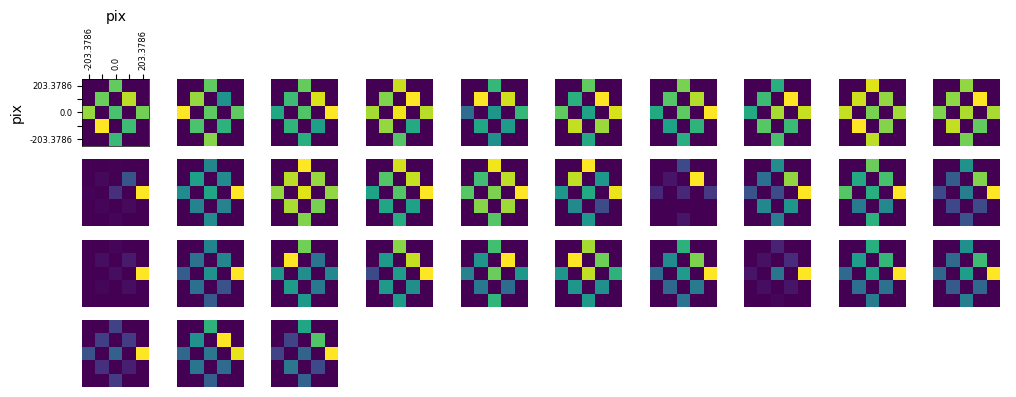

In [38]:
display_rfs(illusion_rfs)

In [39]:
display_rfs(control_rfs)

No receptive fields provided. Nothing to display


### Optotagging
As mentioned earlier, the final epoch of the sessions is optotagging. The principles behind the optotagging are discussed in the [Identifying Optotagged Units](../first-order/optotagging.ipynb) notebook.

In [40]:
opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
opto_stim_table[:20]

,start_time,condition,level,stop_time,stimulus_name,duration,tags,timeseries
id,,,,,,,,
0,7318.96099,cosine pulse,1.4,7319.96099,cosine_1s,1.000,[optical_stimulation],"[(0, 1, optotagging pynwb.ogen.OptogeneticSeri..."
1,7321.17076,2 ms pulse at 1 Hz,1.4,7321.17276,1Hz_2ms,0.002,[optical_stimulation],"[(1, 1, optotagging pynwb.ogen.OptogeneticSeri..."
2,7323.65220,2 ms pulses at 20 Hz,1.4,7324.65220,20Hz_2ms,1.000,[optical_stimulation],"[(2, 1, optotagging pynwb.ogen.OptogeneticSeri..."
3,7326.82191,2 ms pulses at 60 Hz,1.4,7327.82191,60Hz_2ms,1.000,[optical_stimulation],"[(3, 1, optotagging pynwb.ogen.OptogeneticSeri..."
4,7329.87304,2 ms pulses at 20 Hz,1.4,7330.87304,20Hz_2ms,1.000,[optical_stimulation],"[(4, 1, optotagging pynwb.ogen.OptogeneticSeri..."
5,7332.11283,10 ms pulse at 1 Hz,1.4,7332.12283,1Hz_10ms,0.010,[optical_stimulation],"[(5, 1, optotagging pynwb.ogen.OptogeneticSeri..."
6,7334.31469,2 ms pulses at 20 Hz,1.4,7335.31469,20Hz_2ms,1.000,[optical_stimulation],"[(6, 1, optotagging pynwb.ogen.OptogeneticSeri..."
7,7336.87440,2 ms pulses at 60 Hz,1.4,7337.87440,60Hz_2ms,1.000,[optical_stimulation],"[(7, 1, optotagging pynwb.ogen.OptogeneticSeri..."
8,7339.38551,1 second square pulse: continuously on for 1s,1.4,7340.38551,square_1s,1.000,[optical_stimulation],"[(8, 1, optotagging pynwb.ogen.OptogeneticSeri..."


In [41]:
opto_stim_times = [float(row.start_time.iloc[0]) for row in opto_stim_table if isclose(float(row.duration.iloc[0]), 1.0)]
print("Number of stim times:",len(opto_stim_times))
print("Number of units:",len(units_spike_times))

Number of stim times: 500
Number of units: 114


In [42]:
# bin size for counting spikes
time_resolution = 0.005

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.25
window_end_time = 0.5

In [43]:
# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# calculate baseline and stimulus interval indices for use later
stimulus_onset_idx = int(-bin_edges[0] / time_resolution)

opto_spike_matrix = get_spike_matrix(opto_stim_times, units_spike_times, bin_edges)

print(opto_spike_matrix.shape)

(114, 500, 149)


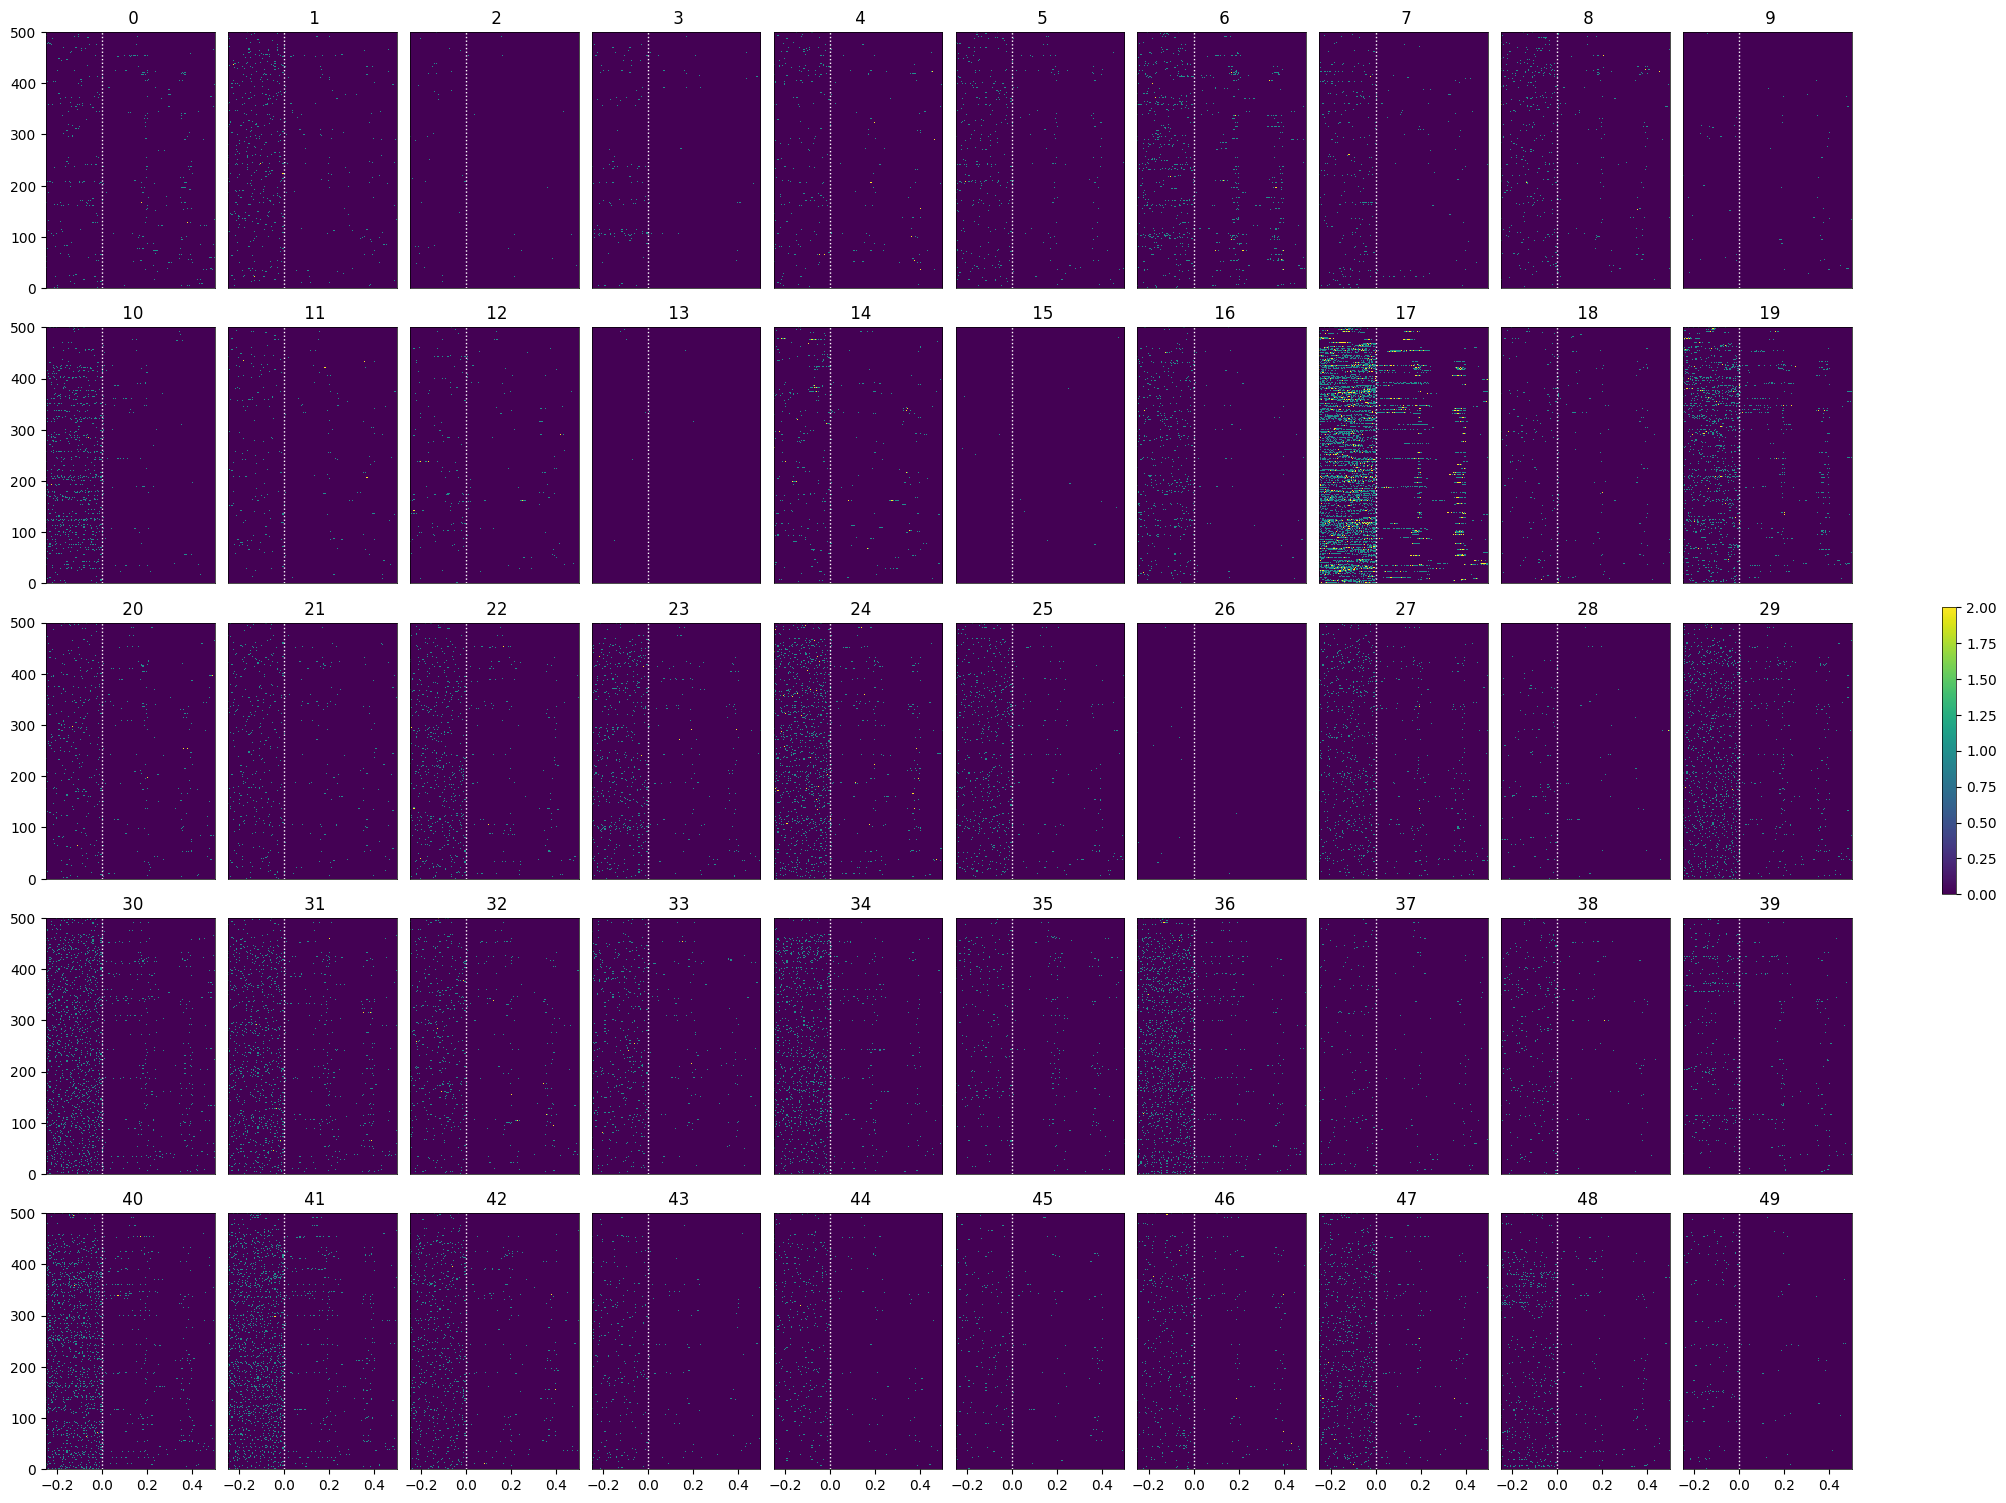

In [44]:
show_many_responses(opto_spike_matrix, 5, 10)

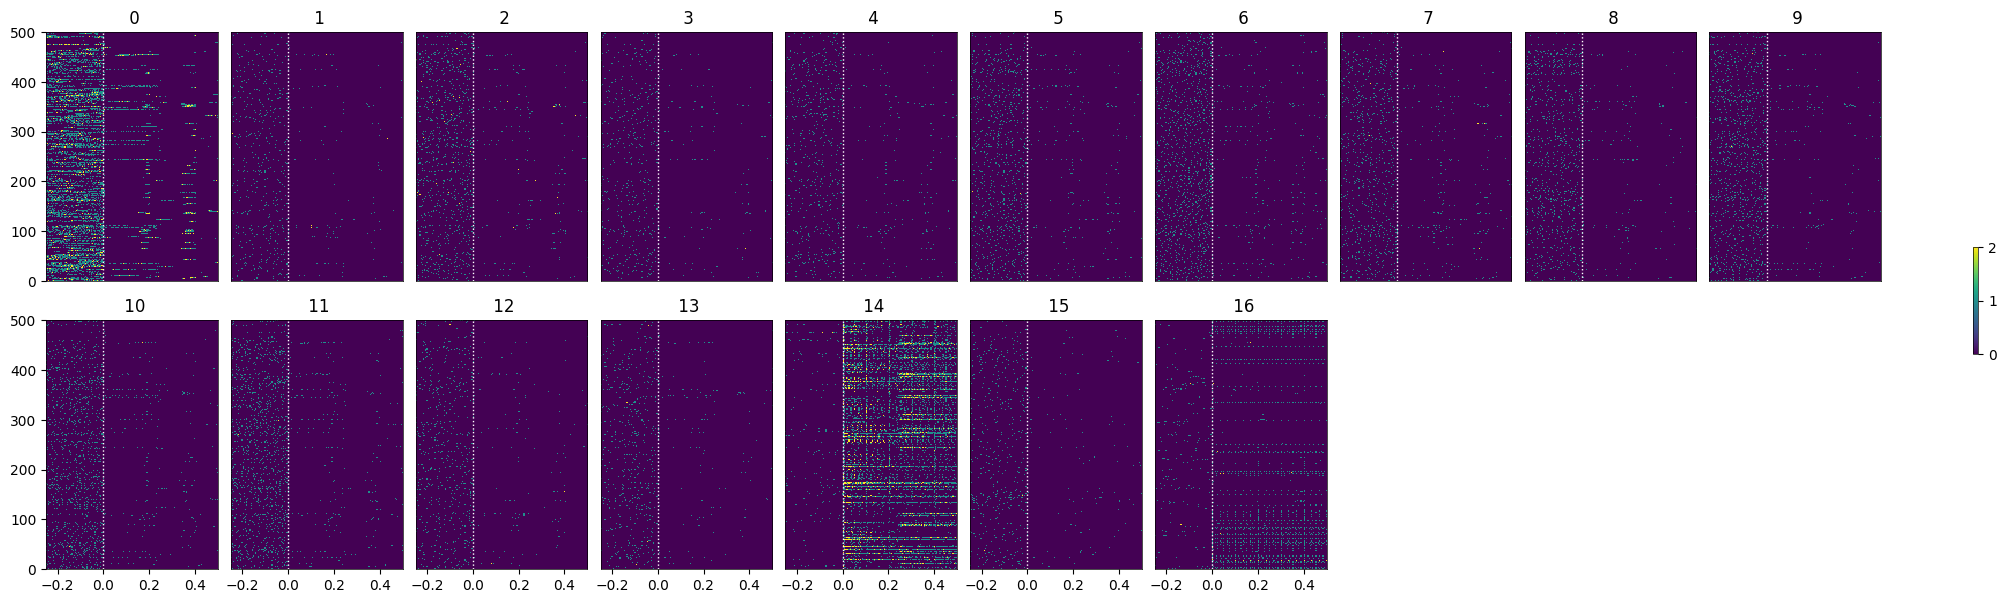

In [45]:
opto_selected_idxs = select_cells(opto_spike_matrix, stimulus_onset_idx)
show_many_responses(opto_spike_matrix[opto_selected_idxs], 5, 10)

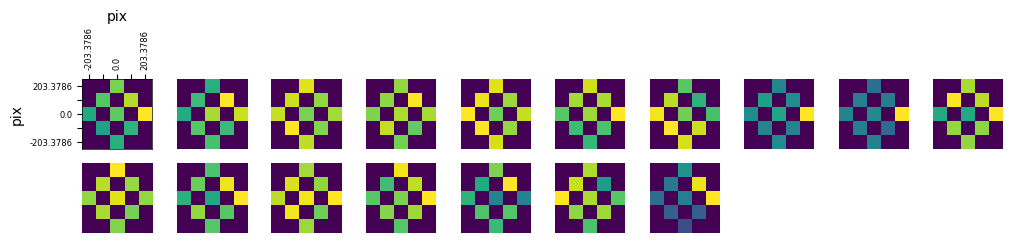

In [46]:
opto_rfs = []
for idx in opto_selected_idxs:
    these_spike_times = units_spike_times[idx]
    opto_rfs.append(get_rf(these_spike_times))

display_rfs(opto_rfs)

## OpenScope Illusion publication: Example Analysis Code

The following code replicates some of the analysis created for the publication that accompanies OpenScope's Illusion project, [{cite}`Shin2023`](https://www.biorxiv.org/content/10.1101/2023.06.05.543698v1), this includes a more robust calculation of the receptive fields for units along with several other metrics.

Here, we are reproducing Fig 1d-g, where we show that mouse primary visual cortex (V1) neurons respond to illusory contours despite the lack of visual information within their receptive fields. Von der Heydt and colleagues had showed the existence of illusory contours in primate visual cortex {cite}`Vonderheydt1984`, {cite}`Vonderheydt1989`. We are replicating their result in mouse V1.

It is important to note that originally we imposed a fixed-gaze restriction; i.e., we only analyzed the trials where the pupil position was within 8 visual degrees of the resting pupil position throughout the duration of the trial. For simplicity, we did not include this condition in this example code.

An example session was selected, thus figures may look different from the paper (Shin et al., 2023 bioRxiv).

In [47]:
# uncomment desired files (more will cause a lot of memory consumption)
nwb_paths = [
    # "sub-619293/sub-619293_ses-1184980079_ogen.nwb",
    # "sub-620333/sub-620333_ses-1188137866_ogen.nwb",
    # "sub-620334/sub-620334_ses-1189887297_ogen.nwb",
    # "sub-625545/sub-625545_ses-1182865981_ogen.nwb",
    # "sub-625554/sub-625554_ses-1181330601_ogen.nwb",
    # "sub-619296/sub-619296_ses-1187930705_ogen.nwb",
    # "sub-625555/sub-625555_ses-1183070926_ogen.nwb",
    # "sub-630506/sub-630506_ses-1192952695_ogen.nwb",
    # "sub-631510/sub-631510_ses-1196157974_ogen.nwb",
    # "sub-631570/sub-631570_ses-1194857009_ogen.nwb",
    "sub-633229/sub-633229_ses-1199247593_ogen.nwb",
    # "sub-637484/sub-637484_ses-1208667752_ogen.nwb"
    ]

nwb_ios = []
for dandi_filepath in nwb_paths:
    # This can sometimes take a while depending on the size of the file
    nwb_ios.append(dandi_download_open(dandiset_id, dandi_filepath, download_loc))


PATH                               SIZE   DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-633229_ses-1199247593_ogen.nwb 3.3 GB 3.3 GB           100%    ok    done                   
Summary:                           3.3 GB 3.3 GB                         1 done                 
                                          100.00%                                               
Downloaded file to ./sub-633229_ses-1199247593_ogen.nwb
Opening file


### Fig. 1e : identifying exclusively center-responsive V1 neurons

In [48]:
def analyzeRFCI(R, trialorder, sponFR):
    """ This function defines the receptive fields (RF) of each neuron.
    Args:
        R (np.ndarray): Firing rate matrix of shape (Nneurons, Ntrials).
        trialorder (np.ndarray): Trial type of each trial.
        trial type description: 10000s: classic 0 vs inverse 1, 1000s: which ctrsizes, 10-100s: which RFcenter, 1s: which direction.
        sponFR (np.ndarray): Spontaneous firing rate of each neuron.
    Returns:
        dict: Dictionary containing the following keys:
            Rrfclassic (np.ndarray): Firing rate of each neuron for each classic RF.
            Rrfinverse (np.ndarray): Firing rate of each neuron for each inverse RF.
            RFindclassic (np.ndarray): Index of the RF with the highest firing rate for each neuron in the classic condition.
            RFindinverse (np.ndarray): Index of the RF with the highest firing rate for each neuron in the inverse condition.
            Pkw_rfclassic (np.ndarray): Kruskal-Wallis p-value for each neuron in the classic condition.
            Pkw_rfinverse (np.ndarray): Kruskal-Wallis p-value for each neuron in the inverse condition.
            sigmc_rfclassic (np.ndarray): Whether the max firing rate is significantly different from the others in the classic condition.
            sigmc_rfinverse (np.ndarray): Whether the max firing rate is significantly different from the others in the inverse condition.
            pRrfclassic (np.ndarray): Wilcoxon p-value for each neuron in the classic condition.
            pRrfinverse (np.ndarray): Wilcoxon p-value for each neuron in the inverse condition.
            pRFclassic (np.ndarray): Wilcoxon p-value for the max firing rate in the classic condition.
            pRFinverse (np.ndarray): Wilcoxon p-value for the max firing rate in the inverse condition.
            RFsigexclclassic (np.ndarray): Whether the max firing rate is significantly different from the others in the classic condition.
            RFsigexclinverse (np.ndarray): Whether the max firing rate is significantly different from the others in the inverse condition.
            RFexclsigclassic (np.ndarray): Whether the max firing rate is significantly different from the others in the classic condition.
            RFexclsiginverse (np.ndarray): Whether the max firing rate is significantly different from the others in the inverse condition.
    """
    if not R.shape[0] == len(sponFR):
        raise ValueError('check sponFR')

    Nneurons = R.shape[0]
    Nrfs = 9
    Rrfclassic = np.zeros((Nneurons, Nrfs))
    Rrfinverse = np.zeros((Nneurons, Nrfs))

    for rfi in range(Nrfs):
        crftrials = (trialorder // 10000 == 0) & ((trialorder % 1000) // 10 == rfi)
        Rrfclassic[:, rfi] = np.mean(R[:, crftrials], axis=1)
        
        irftrials = (trialorder // 10000 == 1) & ((trialorder % 1000) // 10 == rfi)
        Rrfinverse[:, rfi] = np.mean(R[:, irftrials], axis=1)
        
    RFindclassic = np.argmax(Rrfclassic, axis=1)
    RFindinverse = np.argmax(Rrfinverse, axis=1)

    Pkw_rfclassic = np.zeros(Nneurons)
    Pkw_rfinverse = np.zeros(Nneurons)
    sigmc_rfclassic = np.zeros(Nneurons, dtype=bool)
    sigmc_rfinverse = np.zeros(Nneurons, dtype=bool)

    for ci in range(Nneurons):
        # Classic
        crftrials = (trialorder // 10000 == 0)
        unique_groups = np.unique(trialorder[crftrials])
        group_labels = trialorder[crftrials]
        data = R[ci, crftrials]
        try:
            p = kruskal(*[data[group_labels == val] for val in unique_groups])[1]
            Pkw_rfclassic[ci] = p
        except ValueError:
            Pkw_rfclassic[ci] = 1
        
        # Perform Tukey HSD if the p-value from Kruskal-Wallis is significant
        if p < 0.05:
            tukey_results = pairwise_tukeyhsd(data, group_labels)
            # Find rows in the Tukey results related to the max firing rate index
            for comparison in tukey_results.summary().data[1:]:  # Skip the header row
                if RFindclassic[ci] + 1 in comparison[:2]:  # +1 since Python uses 0-indexing
                    sigmc_rfclassic[ci] = comparison[4] < 0.05
                    break

        # Inverse
        irftrials = (trialorder // 10000 == 1)
        unique_groups = np.unique(trialorder[irftrials])
        group_labels = trialorder[irftrials]
        data = R[ci, irftrials]
        try:
            p = kruskal(*[data[group_labels == val] for val in unique_groups])[1]
            Pkw_rfinverse[ci] = p
        except ValueError:
            Pkw_rfinverse[ci] = 1
        # Perform Tukey HSD if the p-value from Kruskal-Wallis is significant
        if p < 0.05:
            tukey_results = pairwise_tukeyhsd(data, group_labels)
            # Find rows in the Tukey results related to the max firing rate index
            for comparison in tukey_results.summary().data[1:]:
                if RFindinverse[ci] + 1 in comparison[:2]:  # +1 since Python uses 0-indexing
                    sigmc_rfinverse[ci] = comparison[4] < 0.05
                    break

    pRrfclassic = np.full((Nneurons, Nrfs), np.nan)
    for rfi in range(Nrfs):
        crftrials = (trialorder // 10000 == 0) & ((trialorder % 1000) // 10 == rfi)
        if np.sum(crftrials) == 0:
            continue
        for ci in range(Nneurons):
            try:
                pRrfclassic[ci, rfi] = wilcoxon(R[ci, crftrials] - sponFR[ci]).pvalue
            except ValueError:
                pass

    pRrfinverse = np.full((Nneurons, Nrfs), np.nan)
    for rfi in range(Nrfs):
        irftrials = (trialorder // 10000 == 1) & ((trialorder % 1000) // 10 == rfi)
        if np.sum(irftrials) == 0:
            continue
        for ci in range(Nneurons):
            try:
                pRrfinverse[ci, rfi] = wilcoxon(R[ci, irftrials] - sponFR[ci]).pvalue
            except ValueError:
                pass

    pRFclassic = pRrfclassic[np.arange(Nneurons), RFindclassic]
    pRFinverse = pRrfinverse[np.arange(Nneurons), RFindinverse]

    tempsorted = np.sort(pRrfclassic, axis=1)
    RFsigexclclassic = (pRFclassic * Nrfs < 0.05) & (pRFclassic == tempsorted[:, 0]) & (np.sum(tempsorted * np.arange(Nrfs, 0, -1) < 0.05, axis=1) == 1)

    tempsorted = np.sort(pRrfinverse, axis=1)
    RFsigexclinverse = (pRFinverse * Nrfs < 0.05) & (pRFinverse == tempsorted[:, 0]) & (np.sum(tempsorted * np.arange(Nrfs, 0, -1) < 0.05, axis=1) == 1)

    RFexclsigclassic = (pRFclassic < 0.05) & (np.sum(pRrfclassic < 0.05, axis=1) == 1)
    RFexclsiginverse = (pRFinverse < 0.05) & (np.sum(pRrfinverse < 0.05, axis=1) == 1)

    RFCI = {
        'Rrfclassic': Rrfclassic,
        'Rrfinverse': Rrfinverse,
        'RFindclassic': RFindclassic,
        'RFindinverse': RFindinverse,
        'Pkw_rfclassic': Pkw_rfclassic,
        'Pkw_rfinverse': Pkw_rfinverse,
        'sigmc_rfclassic': sigmc_rfclassic,
        'sigmc_rfinverse': sigmc_rfinverse,
        'pRrfclassic': pRrfclassic,
        'pRrfinverse': pRrfinverse,
        'pRFclassic': pRFclassic,
        'pRFinverse': pRFinverse,
        'RFsigexclclassic': RFsigexclclassic,
        'RFsigexclinverse': RFsigexclinverse,
        'RFexclsigclassic': RFexclsigclassic,
        'RFexclsiginverse': RFexclsiginverse
    }

    return RFCI


In [49]:
def get_stim_table_info(table_name, table):
    """ This function extracts information from the stimulus table.
    Args:
        table_name (str): Name of the stimulus table.
        table (np.ndarray): Stimulus table. 
    Returns:
        dict: Dictionary containing the following keys:
            start_time (np.ndarray): Start time of each trial.
            stop_time (np.ndarray): Stop time of each trial.
            frame (np.ndarray): Frame number of each trial.
            trialframeinds (np.ndarray): Frame indices of each trial.
            trialstart (np.ndarray): Start time of each trial.
            trialend (np.ndarray): Stop time of each trial.
            numtrials (int): Number of trials.
            trialorder (np.ndarray): Order of each trial.
            trialtypedescription (list): Description of each trial type.
            ICtrialtypes (list): Trial types for IC.
    """

    stim_table_info = {}
    stim_table_info['start_time'] = table['start_time'][:]  # Adjust indexing and loading method
    stim_table_info['stop_time'] = table['stop_time'][:]  # Adjust indexing and loading method
    
    viskeys = list(table.colnames)
    for k in viskeys:
        stim_table_info[k] = table[k][:]  # Adjust indexing and loading method
    
    if 'frame' in stim_table_info:
        frame_firsttrial = next((idx for idx, val in enumerate(stim_table_info['frame']) if val != 0), None)
        if frame_firsttrial is None:
            return stim_table_info  # Skip if 'frame' is empty or all zeros

        # Adjust frame_firsttrial to the nearest multiple of 10
        if frame_firsttrial % 10 != 0:
            warnings.warn('first trial was blank')
            frame_firsttrial = 10 * (frame_firsttrial // 10)

        frame_lasttrial = len(stim_table_info['frame']) - next((idx for idx, val in enumerate(reversed(stim_table_info['frame'])) if val != 0), None) - 1

        # Adjust frame_lasttrial to the nearest multiple of 10 + 9
        if frame_lasttrial % 10 != 9:
            warnings.warn('last trial was blank')
            frame_lasttrial = 10 * (frame_lasttrial // 10) + 9

        trialframeinds = list(range(frame_firsttrial, frame_lasttrial + 1, 2))
        stim_table_info['trialframeinds'] = trialframeinds
        stim_table_info['trialstart'] = [stim_table_info['start_time'][i] for i in trialframeinds]
        stim_table_info['trialend'] = [stim_table_info['stop_time'][i] for i in trialframeinds]
        stim_table_info['numtrials'] = len(trialframeinds)
        stim_table_info['trialorder'] = [stim_table_info['frame'][i] for i in trialframeinds]
        
        if 'cfg1' in table_name:
            stim_table_info['trialtypedescription'] = ['Blank', 'X', 'TC1', 'IC1', 'LC1', 'TC2', 'LC2',
                                                'IC2', 'IRE1', 'IRE2', 'TRE1', 'TRE2', 'XRE1',
                                                'XRE2','InBR', 'InBL', 'InTL', 'InTR', 'OutBR',
                                                'OutBL', 'OutTL', 'OutTL']
        elif 'cfg0' in table_name:
            stim_table_info['trialtypedescription'] = ['Blank', 'X', 'TC1', 'IC1', 'LC1', 'TC2', 'LC2',
                                                'IC2', 'IRE1', 'IRE2', 'TRE1', 'TRE2', 'XRE1', 'XRE2',
                                                'InR', 'InB', 'InL', 'InT', 'OutR', 'OutB', 'OutL', 'OutT']
        else:
            warnings.warn('unrecognized configuration')
        
        stim_table_info['ICtrialtypes'] = [0, 101, 105,106,107,109,110,111, 506, 511, 1105, 1109, 1201,
                                    1299, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308]

        if 'ICwcfg1' in stim_table_info:
            expectNtrials = 5300 #12*400+10*50
        else:
            expectNtrials = 22*30
        
        if stim_table_info['numtrials'] == expectNtrials:
            warnings.warn('check numtrials')
        
    # RFCIblocks
    # (+right, +up)
    # '10000s: which type(classic 0 vs inverse 1), 1000s which ctrsizes, 10~100s which RFcenter,1s: which direction'

    if 'y_position' in stim_table_info.keys():
        stim_table_info['trialstart'] = stim_table_info['start_time']
        stim_table_info['trialend'] = stim_table_info['stop_time']

        yx_position = np.column_stack((stim_table_info['y_position'], stim_table_info['x_position']))
        stim_table_info['sizepix'] = 203.3786
        stim_table_info['MaskDiaVisDeg'] = 16
        # Defining RFcentersrel
        stim_table_info['RFcentersrel'] = np.array([
            [-1, 0],
            [-1/np.sqrt(2), 1/np.sqrt(2)],
            [0, 1],
            [1/np.sqrt(2), 1/np.sqrt(2)],
            [1, 0],
            [1/np.sqrt(2), -1/np.sqrt(2)],
            [0, -1],
            [-1/np.sqrt(2), -1/np.sqrt(2)]
        ])
        stim_table_info['RFcenters'] = stim_table_info['sizepix'] * stim_table_info['RFcentersrel']
        stim_table_info['RFcentersVisDeg'] = stim_table_info['MaskDiaVisDeg'] * stim_table_info['RFcentersrel']
        
        unique_yx_position = np.unique(yx_position, axis=0)
        all_rfcenters_in_unique_yx = all(np.any(np.all(rfcenter == unique_yx_position, axis=1)) for rfcenter in stim_table_info['RFcenters'])

        if not all_rfcenters_in_unique_yx:
            raise ValueError('check RFcenters')
            
        stim_table_info['directions'] = np.unique(stim_table_info['orientation'])
        stim_table_info['MaskList'] = np.unique(stim_table_info['Mask'])
        stim_table_info['numtrials'] = len(stim_table_info['orientation'])
        stim_table_info['trialorder'] = np.zeros((stim_table_info['numtrials']))
        
        for typi, direction in enumerate(stim_table_info['directions']):
            trialsoi = stim_table_info['orientation'] == direction
            stim_table_info['trialorder'][trialsoi] += typi + 1

        for typi in range(len(stim_table_info['RFcenters'])):
            trialsoi = np.all(yx_position == stim_table_info['RFcenters'][typi, :], axis=1)
            stim_table_info['trialorder'][trialsoi] += 10 * (typi + 1)

        for typi, mask in enumerate(stim_table_info['MaskList']):
            trialsoi = stim_table_info['Mask'] == mask
            maskno = int(mask.split('\\')[-1].split('.tif')[0])
            stim_table_info['trialorder'][trialsoi] += maskno 
            
        stim_table_info['trialtypedescription'] = ['10000s: classic 0 vs inverse 1,\
        1000s: which ctrsizes, 10-100s: which RFcenter, 1s: which direction']

    if 'sizeCI' in table_name:
        stim_table_info['trialstart'] = stim_table_info['start_time']
        stim_table_info['trialend'] = stim_table_info['stop_time']
        stim_table_info['directions'] = pd.unique(stim_table_info['orientation'])
        stim_table_info['MaskList'] = pd.unique(stim_table_info['Mask'])
        stim_table_info['numtrials'] = len(stim_table_info['orientation'])
        stim_table_info['trialorder'] = np.zeros(stim_table_info['numtrials'])

        for typi, direction in enumerate(stim_table_info['directions']):
            trialsoi = stim_table_info['orientation'] == direction
            stim_table_info['trialorder'][trialsoi] += typi + 1

        for typi, mask in enumerate(stim_table_info['MaskList']):
            trialsoi = [m == mask for m in stim_table_info['Mask']]
            tempss = mask.split('\\')[-1].split('.tif')[0]
            maskno = int(tempss)
            stim_table_info['trialorder'][trialsoi] += maskno
            
        stim_table_info['MaskDiaVisDeg'] = [0, 4, 8, 16, 32, 64]
        stim_table_info['trialtypedescription'] = ['10000s: classic 0 vs inverse 1,\
        1000s: which ctrsizes, 10-100s: which RFcenter, 1s: which direction']

    return stim_table_info

In [50]:
def calculate_spiketrain(wanted_neurons, timelength, spiketime_data):
    """ This function calculates the spike train matrix.
    Args:
        wanted_neurons (list): List of neurons to be included.
        timelength (int): Length of time.
        spiketime_data (np.ndarray): Spike time data.
    Returns:
        np.ndarray: Spike train matrix.
    """
    
    spiketrainmatrix = np.zeros((len(wanted_neurons), timelength * 1000), dtype = int)
    for unit_idx in range(len(wanted_neurons)):
        unit_spike_times = np.floor(spiketime_data[unit_idx] * 1000).astype(int)
        spiketrainmatrix[unit_idx, unit_spike_times] = 1

    return spiketrainmatrix

In [51]:
def calculate_psthmatrix(spiketrainmatrix, wanted_neurons, trialstart, trial_ind, timeline):
    """ This function calculates the PSTH matrix.
    Args:
        spiketrainmatrix (np.ndarray): Spike train matrix.
        wanted_neurons (list): List of neurons to be included.
        trialstart (np.ndarray): Start time of each trial.
        trial_ind (np.ndarray): Index of each trial.
        timeline (np.ndarray): Timeline.
    Returns:
        np.ndarray: PSTH matrix.
    """
    num_units = len(wanted_neurons)
    num_trials = len(trialstart)
    psthmatrix = np.zeros((num_units, num_trials, len(timeline)), dtype=int)

    for ii in range(len(wanted_neurons)):
        for trial, trial_start in enumerate(trial_ind):
            trial_start = int(trial_start)
            indices = trial_start + timeline
            psthmatrix[ii, trial, :] = spiketrainmatrix[ii, indices]

    return psthmatrix

In [52]:
# iterate through sessions and calculate receptive fields for V1 units

RFCI = {i: [] for i in range(len(nwb_paths))}
sponFRall = {i: [] for i in range(len(nwb_paths))}
psth_session = {i:[] for i in range(len(nwb_paths))}
tempR = {i:[] for i in range(len(nwb_paths))}
vis_dict = {i: {}for i in range(len(nwb_paths))}

for nwb_idx, io in enumerate(nwb_ios):
    nwb = io.read()
    units = nwb.units
    
    units_qc = []
    unit_isi_violations = units['isi_violations'][:]
    unit_amplitude_cutoff = units['amplitude_cutoff'][:]
    unit_presence_ratio = units['presence_ratio'][:]

    # quality control criteria for unit filtering
    units_qc = np.where((unit_isi_violations < 0.5) & (unit_amplitude_cutoff < 0.5) & (unit_presence_ratio > 0.9))[0]

    # find neurons located in V1(VISp)
    V1electrodeindex = np.where(np.array([s.find('VISp') != -1 and s.find('VISpm') == -1 for s in nwb.electrodes['location'][:]]))[0]
    V1electrode_ids = [nwb.electrodes['id'][idx] for idx in V1electrodeindex]
    electrodes_key = 1000 * nwb.electrodes['probe_id'][:] + nwb.electrodes['local_index']
    V1common_values = np.intersect1d(V1electrode_ids, electrodes_key)
    V1units = np.where(np.isin(units['peak_channel_id'], V1common_values))[0]
    V1units_qc = np.intersect1d(V1units, units_qc) # quality controlled units' indices

    max_spike_times = [max(units["spike_times"][unit_idx]) for unit_idx in V1units_qc]
    Tlen = int(np.ceil(max(max_spike_times))) # time length for spike train matrix
    spike_times = units["spike_times"][V1units_qc[0:len(V1units_qc)]]

    Tres = 0.001

    spiketrain = calculate_spiketrain(V1units_qc, Tlen, spike_times)
    
    # vis extracts all relevant information about visual presentations
    all_tables_info = {}
    # table_names = list(nwb.intervals.keys())  # Adjust the path according to your NWB file structure
    for table_name, table in nwb.intervals.items():
        all_tables_info[table_name] = get_stim_table_info(table_name, table)
        
    durations = all_tables_info['spontaneous_presentations']['stop_time'] - all_tables_info['spontaneous_presentations']['start_time']
    mv = np.max(durations)
    mi = np.argmax(durations)
    

    # Calculate start and end indices
    sponTstartind = np.floor(all_tables_info['spontaneous_presentations']['start_time'][mi] / Tres).astype(int) + 1
    sponTendind = np.floor(all_tables_info['spontaneous_presentations']['stop_time'][mi] / Tres).astype(int)

    # Compute mean firing rates
    sponFRall[nwb_idx] = np.mean(spiketrain[:, sponTstartind:sponTendind], axis=1) / Tres
    meanFRall = np.mean(spiketrain, axis=1) / Tres
    
    psth = {}
    psthtli = np.arange(-500, 1000)
    for table_name in nwb.intervals:
        if 'spontaneous' in table_name or 'invalid_times' in table_name:
            continue

        trialstart_array = np.array(all_tables_info[table_name]['trialstart'])
        psthtrialinds = np.floor(trialstart_array / Tres).astype(int) + 1
        
        psth[table_name] = calculate_psthmatrix(spiketrain, V1units_qc, trialstart_array, psthtrialinds, psthtli)

    psth_session[nwb_idx] = psth
    vis_dict[nwb_idx] = all_tables_info
    
    tloi = (psthtli > 0) & (psthtli <= 1000)
    tempR[nwb_idx] = 1000 * np.mean(psth['RFCI_presentations'][:, ::4, tloi], axis=2).squeeze()
    temptrialorder = all_tables_info['RFCI_presentations']['trialorder'][::4]

    # Assuming the function analyzeRFCI is already defined as per the previous translation
    RFCI[nwb_idx] = analyzeRFCI(tempR[nwb_idx], temptrialorder, sponFRall[nwb_idx])

In [53]:
num_signeurons = 0
sig_neurons = {i: [] for i in range(len(nwb_paths))}
for path_idx in range(len(nwb_paths)):
    sig_neurons[path_idx] = np.where(np.logical_and(RFCI[path_idx]['RFsigexclclassic'], RFCI[path_idx]['RFindclassic'] == 0))[0]
    num_signeurons += len(sig_neurons[path_idx])

num_signeurons

5

In [54]:
RFcenters = np.vstack(([0, 0], vis_dict[0]['RFCI_presentations']['RFcenters']))
RFcenters

array([[   0.        ,    0.        ],
       [-203.3786    ,    0.        ],
       [-143.81038721,  143.81038721],
       [   0.        ,  203.3786    ],
       [ 143.81038721,  143.81038721],
       [ 203.3786    ,    0.        ],
       [ 143.81038721, -143.81038721],
       [   0.        , -203.3786    ],
       [-143.81038721, -143.81038721]])

In [55]:
# select trial order index what we want
position_all = {i:[]for i in range(len(nwb_paths))}
for path_idx in range(len(nwb_paths)):
    nrf = 9

    trialorder = vis_dict[path_idx]['RFCI_presentations']['trialorder']
    position= {i:[] for i in range(nrf)}
    
    for i in range(nrf):
        position[i] = np.where(np.logical_and(vis_dict[path_idx]['RFCI_presentations']['trialorder']//10%10 == i, vis_dict[path_idx]['RFCI_presentations']['trialorder']//10000 == 0))[0][::4]
    position_all[path_idx] = position


In [56]:
mean_psth_all = {i:[] for i in range(nrf)}
for path_idx in range(len(nwb_paths)):
    if not len(sig_neurons[path_idx]) == 0:
        sig_psth = psth_session[path_idx]['RFCI_presentations'][sig_neurons[path_idx],:,:]
        for i in range(nrf):
            mean_psth = (sig_psth[:, position_all[path_idx][i],500:])/Tres - sponFRall[path_idx][sig_neurons[path_idx]][:, np.newaxis, np.newaxis]
            mean_psth_all[i].append(mean_psth)


In [57]:
each_mean_psth = {i:[] for i in range(nrf)}
for i in range(nrf):
    each_mean_psth[i] = np.mean(np.concatenate(mean_psth_all[i], axis = 0), axis = (1, 2))

### Plot the receptive field of each exclusively center-responsive V1 neuron

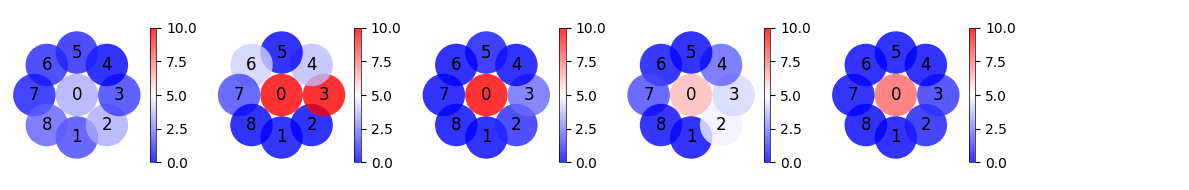

In [58]:
cols = 6
rows = (num_signeurons // cols) + 1

fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))  
axes = axes.flatten()  

for num in range(num_signeurons):
    firing_rate_allneurons = []
    for i in range(nrf):
        firing_rate_allneurons.append(each_mean_psth[i][num])

    radius = max(np.unique([y for y, x in RFcenters])) * 2 / 4

    ax = axes[num]

    # Create a list to hold the circle patches
    circles = []

    # Loop through each position and create a circle patch with the mean firing rate color
    for idx, (rate, (y, x)) in enumerate(zip(firing_rate_allneurons, RFcenters)):
        circle = patches.Circle((x, y), radius)
        circles.append(circle)
        ax.text(x, y, str(range(nrf)[idx]), color='black', ha='center', va='center', fontsize=12)

    # Create a patch collection with the circles
    p = PatchCollection(circles, cmap='bwr', alpha=0.8)

    # Set the array for the colormap with normalized firing rates
    p.set_array(firing_rate_allneurons)
    p.set_clim([0, 10])
    p.set_norm(Normalize(vmin=0, vmax=10))

    # Add the patch collection to the axis
    ax.add_collection(p)

    # Format the plot
    ax.set_aspect('equal')
    ax.set_xlim(-320, 320)
    ax.set_ylim(-320, 320)
    ax.axis('off')

    
    fig.colorbar(p, ax=ax, fraction=0.046, pad=0.04)


for ax in axes[num_signeurons:]:
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [59]:
firing_rate_position = []
for i in range(nrf):
    firing_rate = np.mean(np.concatenate(mean_psth_all[i], axis = 0))
    firing_rate_position.append(firing_rate)

### Plot the average of exclusively center-responsive V1 neurons

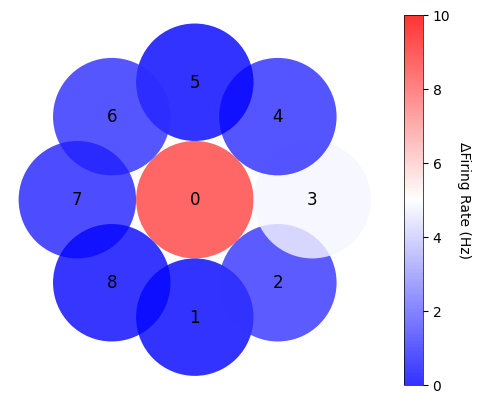

In [60]:
# Initialize the figure and axis
fig, ax = plt.subplots()

# Create a list to hold the circle patches
circles = []

# Loop through each position and create a circle patch with the mean firing rate color
for idx, (rate, (y, x)) in enumerate(zip(firing_rate_position, RFcenters)):
    circle = patches.Circle((x, y), radius)
    circles.append(circle)
    ax.text(x, y, str(range(nrf)[idx]), color='black', ha='center', va='center', fontsize=12)

# Create a patch collection with the circles
p = PatchCollection(circles, cmap='bwr', alpha=0.8)

# Set the array for the colormap with normalized firing rates
p.set_array(firing_rate_position)
p.set_clim([0, 10])
p.set_norm(Normalize(vmin=0, vmax=10))

# Add the patch collection to the axis
ax.add_collection(p)

# Format the plot
ax.set_aspect('equal')
ax.set_xlim(-320, 320)
ax.set_ylim(-320, 320)
plt.axis('off')

# Create a colorbar
cbar = plt.colorbar(p, ax=ax)
cbar.set_label('ΔFiring Rate (Hz)', rotation=270, labelpad=15)

# Show the plot
plt.show()

### Figure. 1f : stacked peri-stimulus time histograms (PSTHs) depicting evoked responses to $I_{C}$ and $I_{RE}$ images for exclusively center-responsive V1 neurons

note, we are subtracting spontaneous period activity from each neuron to assess the magnitude of visual evoked activity (i.e., change from baseline)

In [61]:
ICtrials = [7, 3] # trial order is 45, 135 dgree in ICwcfg1_presentations, 0, 90 degree in ICwcfg0_presentations
REtrials = [9, 8]

In [62]:
IC_aggregate_list1 = []
RE_aggregate_list1 = []
for path_idx in range(len(nwb_paths)):
    sig = sig_neurons[path_idx]
    if not len(sig) == 0:       
        trial_order = vis_dict[path_idx]['ICwcfg1_presentations']['trialorder']
        
        indices_by_element = {}
        for item in ICtrials:
            indices = np.where(np.array(trial_order) == item)[0]
            indices_by_element[item] = indices.tolist()

        for item in REtrials:
            indices = np.where(np.array(trial_order) == item)[0]
            indices_by_element[item] = indices.tolist()


        sig_psth1 = psth_session[path_idx]['ICwcfg1_presentations'][sig,:,:] / Tres -  sponFRall[path_idx][sig][:, np.newaxis, np.newaxis]


        ICpsth = np.concatenate([sig_psth1[:, indices_by_element[idx], :] for idx in ICtrials], axis = 1)  # Concatenate along the trial axis
        REpsth = np.concatenate([sig_psth1[:, indices_by_element[idx], :] for idx in REtrials], axis = 1)  # Concatenate along the trial axis

        IC_aggregate_list1.append(ICpsth)
        RE_aggregate_list1.append(REpsth)

# After all files are processed, concatenate the list of arrays into a single array
if IC_aggregate_list1:
    IC_1 = np.concatenate(IC_aggregate_list1, axis=0)  # Concatenate along the neuron axis
if RE_aggregate_list1:
    RE_1 = np.concatenate(RE_aggregate_list1, axis=0)
    

In [63]:
IC_aggregate_list0 = []
RE_aggregate_list0 = []
for path_idx in range(len(nwb_paths)):
    sig = sig_neurons[path_idx]
    if not len(sig) == 0:       
        trial_order = vis_dict[path_idx]['ICwcfg0_presentations']['trialorder']

        indices_by_element = {}
        for item in ICtrials:
            indices = np.where(np.array(trial_order) == item)[0]
            indices_by_element[item] = indices.tolist()

        for item in REtrials:
            indices = np.where(np.array(trial_order) == item)[0]
            indices_by_element[item] = indices.tolist()

        sig_psth0 = psth_session[path_idx]['ICwcfg0_presentations'][sig,:,:] / Tres -  sponFRall[path_idx][sig][:, np.newaxis, np.newaxis]


        ICpsth = np.concatenate([sig_psth0[:, indices_by_element[idx], :] for idx in ICtrials], axis = 1)  # Concatenate along the trial axis
        REpsth = np.concatenate([sig_psth0[:, indices_by_element[idx], :] for idx in REtrials], axis = 1)  # Concatenate along the trial axis

        IC_aggregate_list0.append(ICpsth)
        RE_aggregate_list0.append(REpsth)

# After all files are processed, concatenate the list of arrays into a single array
if IC_aggregate_list0:
    IC_0 = np.concatenate(IC_aggregate_list0, axis=0)  # Concatenate along the neuron axis
if RE_aggregate_list0:
    RE_0 = np.concatenate(RE_aggregate_list0, axis=0)
    

In [64]:
IC_aggregate = np.concatenate([IC_0, IC_1], axis = 1)
RE_aggregate = np.concatenate([RE_0, RE_1], axis = 1)


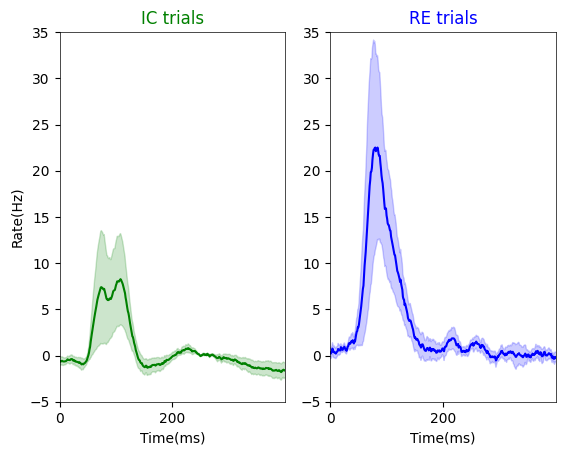

In [65]:
kernel = np.full(25,1)

IC_convol = np.apply_along_axis(lambda x: np.convolve(x, kernel, 'same'), axis=2, arr=IC_aggregate) / (np.sum(kernel))
IC_mean = np.mean(IC_convol, axis = (0,1))

SEM_IC = (np.std(np.mean(IC_convol, axis = 1), axis = 0)/np.sqrt(IC_convol.shape[0]))

plt.subplot(1,2,1)
plt.plot(psthtli, IC_mean, color = 'g')
plt.fill_between(psthtli, (IC_mean-SEM_IC), (IC_mean + SEM_IC), color = 'g', alpha = 0.2)
plt.xlabel('Time(ms)')
plt.ylabel('Rate(Hz)')
plt.xlim(0, 400)
plt.ylim(-5, 35)
plt.xticks(np.arange(0, 400, 200))
plt.title('IC trials', color = 'g')


RE_convol = np.apply_along_axis(lambda x: np.convolve(x, kernel, 'same'), axis=2, arr=RE_aggregate) / (np.sum(kernel))
RE_mean = np.mean(RE_convol, axis =(0,1))

SEM_RE = (np.std(np.mean(RE_convol, axis = 1), axis = 0)/np.sqrt(RE_convol.shape[0]))
plt.subplot(1,2,2)
plt.plot(psthtli, RE_mean, color = 'b')
plt.fill_between(psthtli, (RE_mean-SEM_RE), (RE_mean + SEM_RE), color = 'b', alpha = 0.2)
plt.xlim(0, 400)
plt.ylim(-5, 35)
plt.xticks(np.arange(0, 400, 200))

plt.title('RE trials', color = 'b')
plt.xlabel('Time(ms)')


plt.show()

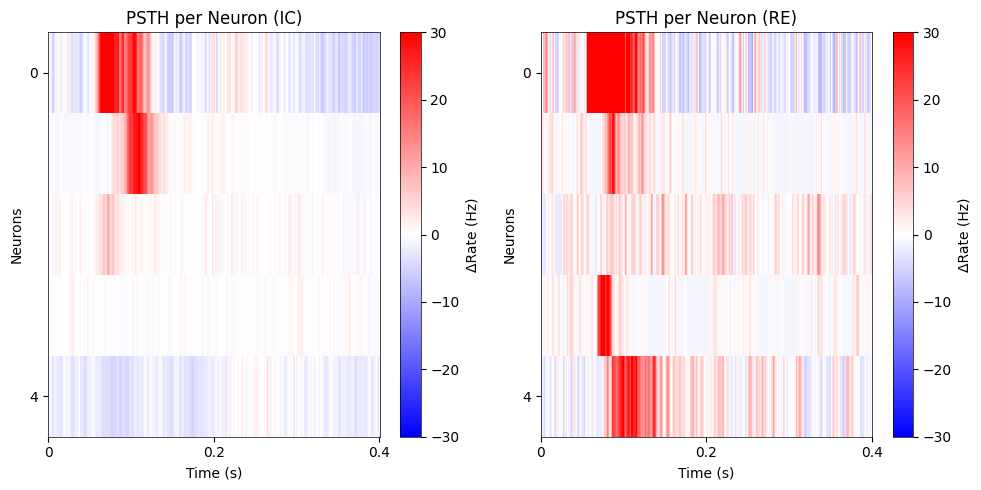

In [66]:
sigma = 1
IC_convol = gaussian_filter1d(IC_aggregate, sigma=sigma, axis=2)
RE_convol = gaussian_filter1d(RE_aggregate, sigma=sigma, axis=2)

stim_time = (psthtli > 0) & (psthtli <= 400)
sorted_indices = np.argsort(np.mean(IC_convol[:,:,stim_time], axis=(1,2)))[::-1]

IC_heat = np.mean(IC_convol[:,:,stim_time], axis=1)
RE_heat = np.mean(RE_convol[:,:,stim_time], axis=1)

sorted_IC_heat = IC_heat[sorted_indices, :]
sorted_RE_heat = RE_heat[sorted_indices, :] #in same order with IC heat

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

psth = axes[0].imshow(sorted_IC_heat, cmap='bwr', vmin=-30, vmax=30, aspect='auto', interpolation='nearest')
fig.colorbar(psth, ax=axes[0], label='ΔRate (Hz)')
axes[0].set_title('PSTH per Neuron (IC)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Neurons')
axes[0].set_ylim(sorted_IC_heat.shape[0] - 0.5, -0.5) 
axes[0].set_yticks([0, sorted_IC_heat.shape[0] - 1]) 
axes[0].set_yticklabels(['0', str(sorted_IC_heat.shape[0] - 1)])
axes[0].set_xticks(np.linspace(0, sorted_IC_heat.shape[1] - 1, 3))
axes[0].set_xticklabels(['0', '0.2', '0.4'])

psth2 = axes[1].imshow(sorted_RE_heat, cmap='bwr', vmin=-30, vmax=30, aspect='auto', interpolation='nearest')
fig.colorbar(psth2, ax=axes[1], label='ΔRate (Hz)')
axes[1].set_title('PSTH per Neuron (RE)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Neurons')
axes[1].set_ylim(sorted_RE_heat.shape[0] - 0.5, -0.5)
axes[1].set_yticks([0, sorted_RE_heat.shape[0] - 1])
axes[1].set_yticklabels(['0', str(sorted_RE_heat.shape[0] - 1)])
axes[1].set_xticks(np.linspace(0, sorted_RE_heat.shape[1] - 1, 3))
axes[1].set_xticklabels(['0', '0.2', '0.4'])

plt.tight_layout()
plt.show()

### Fig. 1g : for exclusively center-responsive V1 neurons that are also responsive to at least one of the four $I_{C}$ images, compare the preferred orientation for $I_{C}$ vs $I_{RE}$ images

In [67]:
# Define neurons that significantly respond to IC images.
sig_IC = [3,7]
blank_aggregate1 = []
blank_aggregate0 = []
IC_aggregate_list1 = []
IC_aggregate_list0 = []
for path_idx in range(len(nwb_paths)):
    sig = sig_neurons[path_idx]
    if not len(sig) == 0:       
        trial_order = vis_dict[path_idx]['ICwcfg1_presentations']['trialorder']
        
        indices_by_element = {}
        for item in sig_IC:
            indices = np.where(np.array(trial_order) == item)[0]
            indices_by_element[item] = indices.tolist()
        indices_by_element[0] = np.where(np.array(trial_order) == 0) #index of blank
        

        sig_psth1 = psth_session[path_idx]['ICwcfg1_presentations'][sig,:,:] / Tres
        
        ICpsth = np.concatenate([sig_psth1[:, indices_by_element[idx], :] for idx in sig_IC], axis = 1)  # Concatenate along the trial axis
        blank_psth = np.concatenate([sig_psth1[:, indices_by_element[0][0], :]], axis=1)

        
        IC_aggregate_list1.append(ICpsth)
        blank_aggregate1.append(blank_psth)
        
        
for path_idx in range(len(nwb_paths)):
    sig = sig_neurons[path_idx]
    if not len(sig) == 0:       
        trial_order = vis_dict[path_idx]['ICwcfg0_presentations']['trialorder']
        
        indices_by_element = {}
        for item in sig_IC:
            indices = np.where(np.array(trial_order) == item)[0]
            indices_by_element[item] = indices.tolist()
        indices_by_element[0] = np.where(np.array(trial_order) == 0)
        


        sig_psth1 = psth_session[path_idx]['ICwcfg0_presentations'][sig,:,:] / Tres
        

        ICpsth = np.concatenate([sig_psth1[:, indices_by_element[idx], :] for idx in sig_IC], axis = 1)  # Concatenate along the trial axis
        blank_psth = np.concatenate([sig_psth1[:, indices_by_element[0][0], :]], axis=1)


        IC_aggregate_list0.append(ICpsth)
        blank_aggregate0.append(blank_psth)

# After all files are processed, concatenate the list of arrays into a single array
if IC_aggregate_list1:
    sig_IC_1 = np.concatenate(IC_aggregate_list1, axis=0)  # Concatenate along the neuron axis
    
if IC_aggregate_list0:
    sig_IC_0 = np.concatenate(IC_aggregate_list0, axis=0)
    
if blank_aggregate0:
    sig_blank_0 = np.concatenate(blank_aggregate0, axis=0)
    
if blank_aggregate1:
    sig_blank_1 = np.concatenate(blank_aggregate1, axis=0)

In [68]:
mean_IC_0 = np.mean(sig_IC_0[:,:, stim_time], axis=2)
mean_blank_0 = np.mean(sig_blank_0[:,:, stim_time], axis=2)

len_IC1 = int(mean_IC_0.shape[1]/2)

p_values0_IC1 = []
p_values0_IC2 = []
for i in range(mean_IC_0.shape[0]):
    #Statistics on 'blank' and 'IC1 trial' in ICwcfg0 presentations
    stat, p = stats.mannwhitneyu(mean_IC_0[i, :len_IC1], mean_blank_0[i, :], alternative='greater')
    p_values0_IC1.append(p)
    
    #Statistics on 'blank' and 'IC2 trial' in ICwcfg0 presentations
    stat, p = stats.mannwhitneyu(mean_IC_0[i, len_IC1:], mean_blank_0[i, :], alternative='greater')
    p_values0_IC2.append(p)


In [69]:
mean_IC_1 = np.mean(sig_IC_1[:,:, stim_time], axis=2)
mean_blank_1 = np.mean(sig_blank_1[:,:, stim_time], axis=2)

len_IC1 = int(mean_IC_1.shape[1]/2)

p_values1_IC1 = []
p_values1_IC2 = []

for i in range(mean_IC_1.shape[0]):
    # Statistics on 'blank' and 'IC1 trial' in ICwcfg1 presentations
    stat, p = stats.mannwhitneyu(mean_IC_1[i, :len_IC1], mean_blank_1[i, :], alternative='greater')
    p_values1_IC1.append(p)
    #Statistics on 'blank' and 'IC2 trial' in ICwcfg1 presentations
    stat, p = stats.mannwhitneyu(mean_IC_1[i, len_IC1:], mean_blank_1[i, :], alternative='greater')
    p_values1_IC2.append(p)

In [70]:
p_values_list = [p_values0_IC1, p_values0_IC2, p_values1_IC1, p_values1_IC2]
p_values = np.zeros((num_signeurons, len(p_values_list)))
for idx, p in enumerate(p_values_list):
    p_values[:, idx] = p


In [71]:
IC_sig_ind = np.where((np.sort(p_values, axis = 1) * np.arange(4, 0, -1))[:,0] < 0.05)[0]

order of IC_means and RE_means is **0, 45, 90, 135 degree**

In [72]:
len_IC0 = int(IC_0.shape[1]/2)
len_IC1 = int(IC_1.shape[1]/2)
len_RE0 = int(RE_0.shape[1]/2)
len_RE1 = int(RE_1.shape[1]/2)

In [73]:
IC_means = [
    np.mean(IC_0[:, 0:len_IC0, stim_time], axis=(1,2)),
    np.mean(IC_1[:, 0:len_IC1, stim_time], axis=(1,2)),
    np.mean(IC_0[:, len_IC0:len_IC0*2, stim_time], axis=(1,2)),
    np.mean(IC_1[:, len_IC1:len_IC1*2, stim_time], axis=(1,2))
]


IC_combined_means = np.array(IC_means).T


In [74]:
RE_means = [
    np.mean(RE_0[:, 0:len_RE0, stim_time], axis=(1,2)),
    np.mean(RE_1[:, 0:len_RE1, stim_time], axis=(1,2)),
    np.mean(RE_0[:, len_RE0:len_RE0*2, stim_time], axis=(1,2)),
    np.mean(RE_1[:, len_RE1:len_RE1*2, stim_time], axis=(1,2))
]


RE_combined_means = np.array(RE_means).T


In [75]:
RE_max_idx = np.argmax(RE_combined_means[IC_sig_ind], axis = 1)
IC_max_idx = np.argmax(IC_combined_means[IC_sig_ind], axis = 1)

In [76]:
pref_ori = np.zeros((RE_combined_means.shape[1], IC_combined_means.shape[1]), dtype = int)
for re_idx, ic_idx in zip(RE_max_idx, IC_max_idx):
    pref_ori[re_idx, ic_idx] += 1

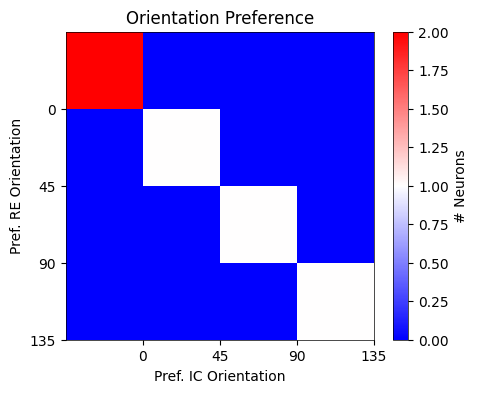

In [77]:
orientations = [0, 45, 90, 135]


plt.figure(figsize=(5, 4))
oris = plt.imshow(pref_ori, cmap='bwr', vmin=0, vmax=2)
plt.title('Orientation Preference')
plt.xlabel('Pref. IC Orientation')
plt.ylabel('Pref. RE Orientation')
plt.xticks(np.arange(len(orientations)) + 0.5, labels=orientations)
plt.yticks(np.arange(len(orientations)) + 0.5, labels=orientations, rotation=0)
fig.colorbar(oris, label='# Neurons')
plt.show()